# Combine unfolded results and make final plots

Here is the script to assemble the unfolded results from `2DData_expunc.root` and `2DClosure_expunc.root` and make the final plots of the analysis. 

Note: You have to access the files through cernbox as they are too large for github. 

https://cernbox.cern.ch/cernbox/desktop/index.php/s/rsYvLcidoUFEKV0

https://cernbox.cern.ch/cernbox/desktop/index.php/s/DsRRXR9bEKOGzoU



In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")



Welcome to JupyROOT 6.10/08


0L

In [2]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
#ROOT.gStyle.SetLabelFont(43,"XYZ")
#ROOT.gStyle.SetLabelSize(22,"XYZ")

ROOT.gStyle.SetLabelFont(43, "YZ")
ROOT.gStyle.SetLabelSize(24, "YZ")
ROOT.gStyle.SetLabelFont(42, "X")
ROOT.gStyle.SetLabelSize(0.15, "X")

lumi = 2.3e3

pythiafile = "responses_jecsrcs_otherway_qcdmc_2dplots.root"
herwigfile = "qcdmc_herwig_otherway_jecsrcs_2dplots.root"


#### Absolute cross section for ungroomed jets

{'_jec': <ROOT.TH2F object ("2d_response_jernom__jec") at 0x7f9aba5f0200>, '_pdf': <ROOT.TH2F object ("2d_response_nomnom_pdf") at 0x7f9abb5a9800>, '_jmr': <ROOT.TH2F object ("2d_response_jmrnom__jmr") at 0x7f9abf421600>, '_jms': <ROOT.TH2F object ("2d_response_jernom__jms") at 0x7f9abe9bc800>, '_pu': <ROOT.TH2F object ("2d_response_jernom__pu") at 0x7f9abb497600>, '_mcStat': <ROOT.TH2F object ("2d_response_nomnom_mcStat") at 0x7f9abeb67600>, '_jer': <ROOT.TH2F object ("2d_response_jernom__jer") at 0x7f9abb4a7c00>, '_ps': <ROOT.TH2F object ("2d_response_nomnom_ps") at 0x7f9abeb5c600>, '_lum': <ROOT.TH2F object ("2d_response_nomnom_lum") at 0x7f9abeb32800>, '_totunc': None}
data integral: 81.957082707
pythia integral: 80.6442855036
herwig integral: 84.1881198101


Info in <TCanvas::Print>: png file fullxs_absolute1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute1.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute2.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute3.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute4.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute5.png has been created
Info in <TCanvas::Print>: pdf file full

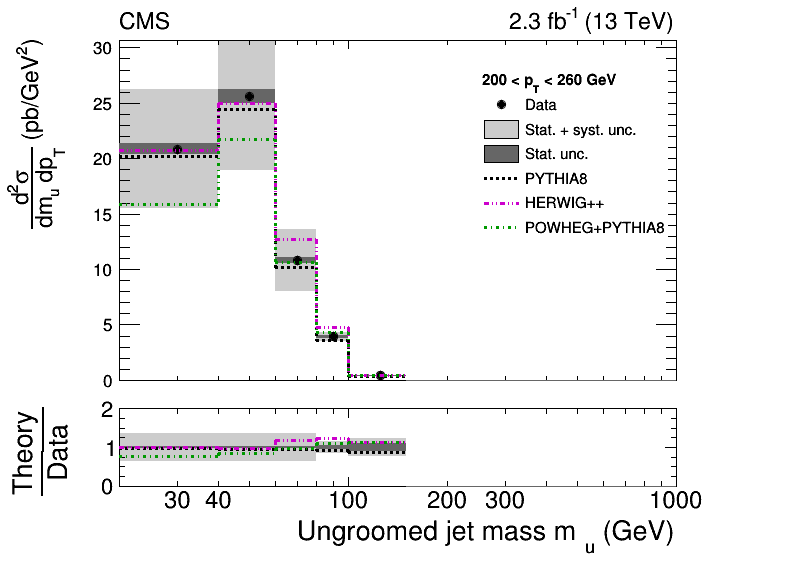

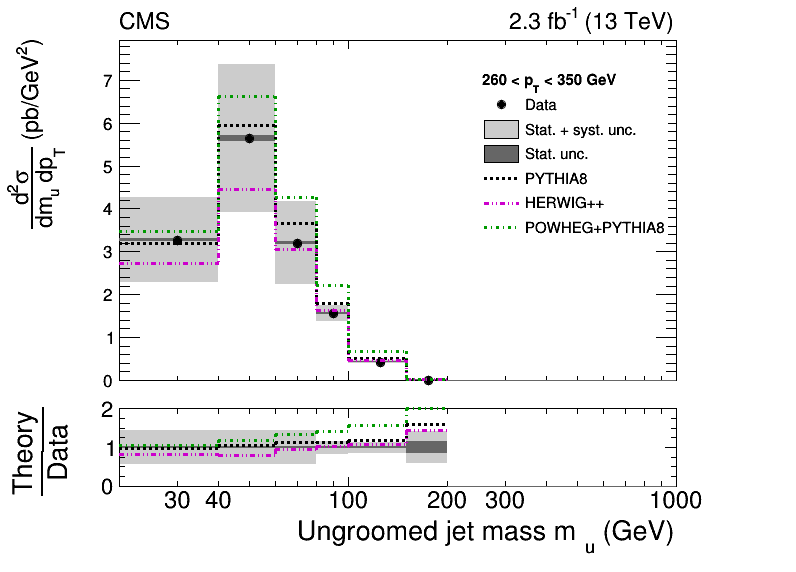

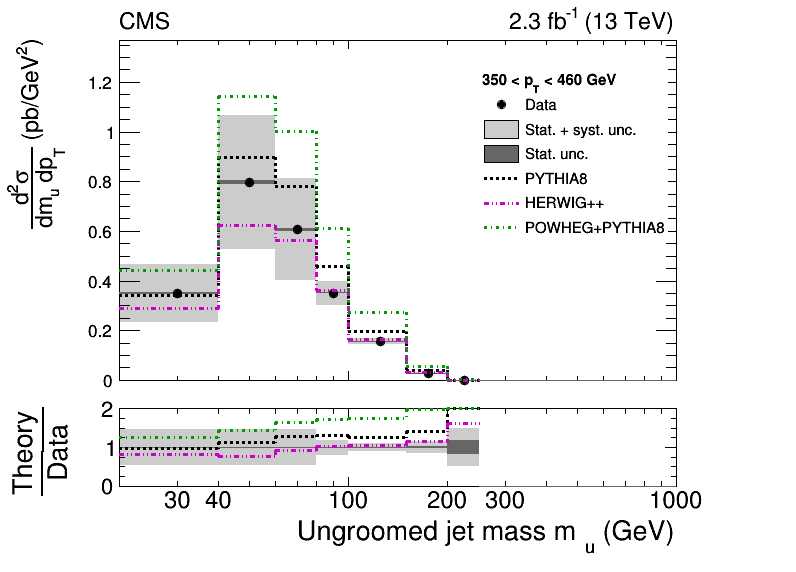

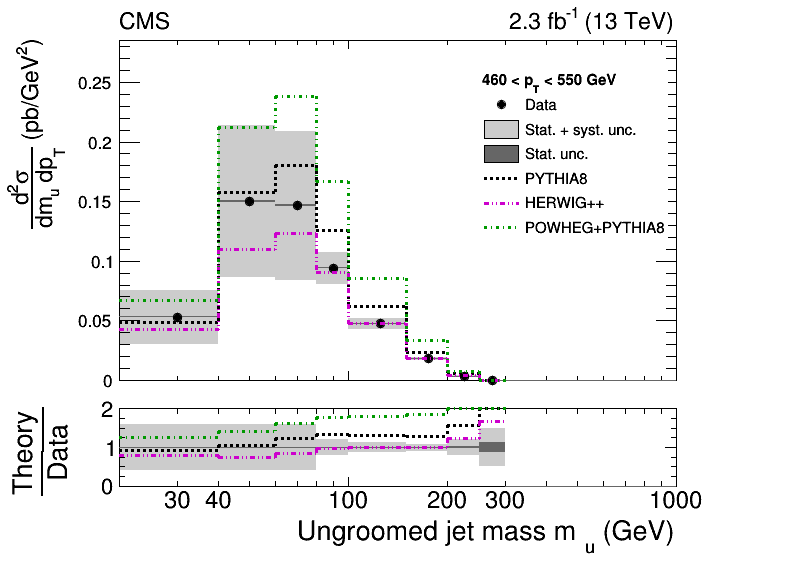

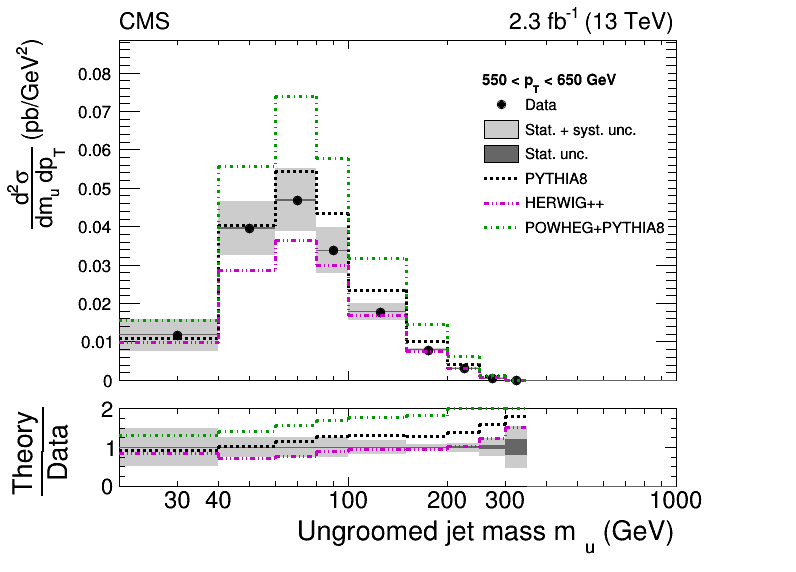

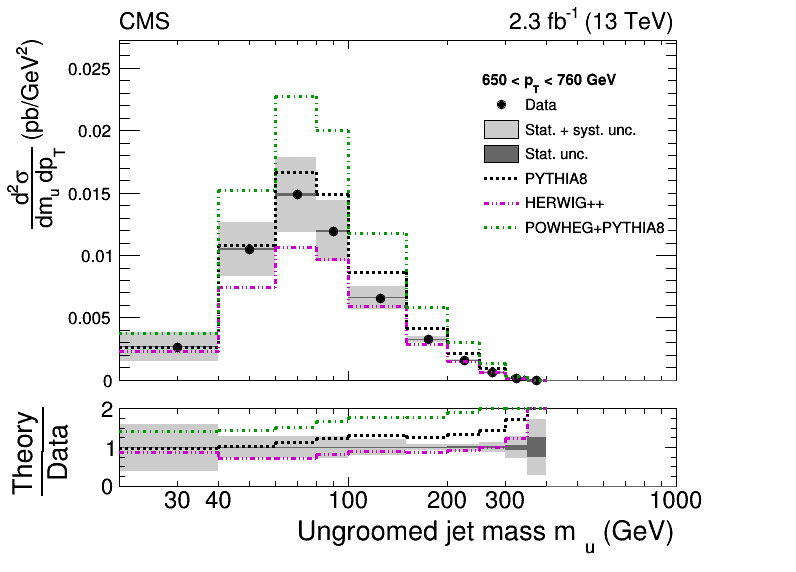

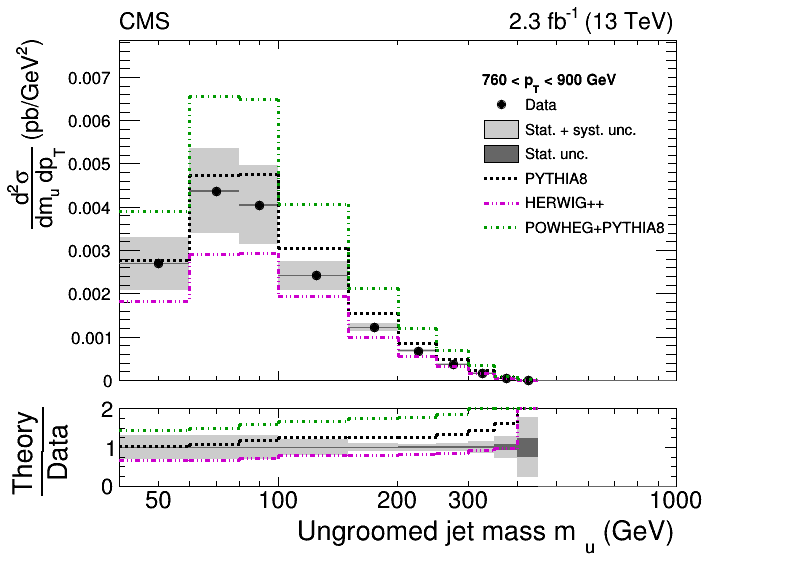

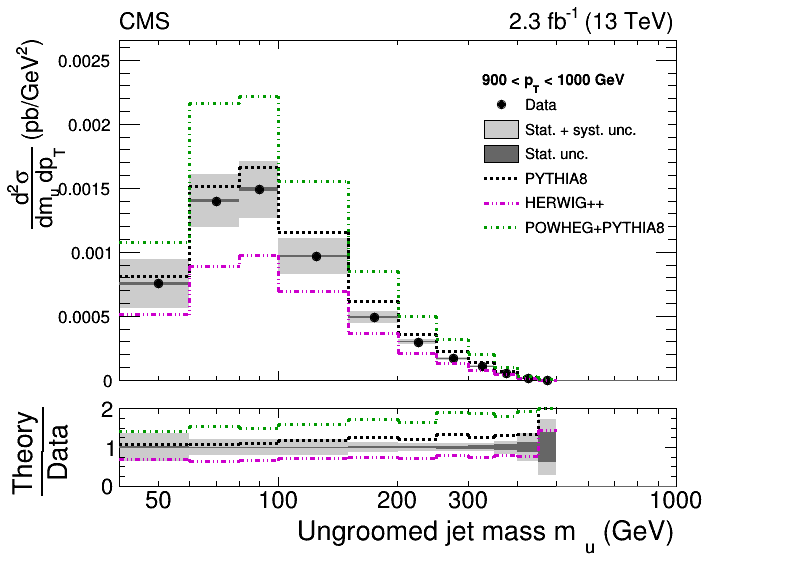

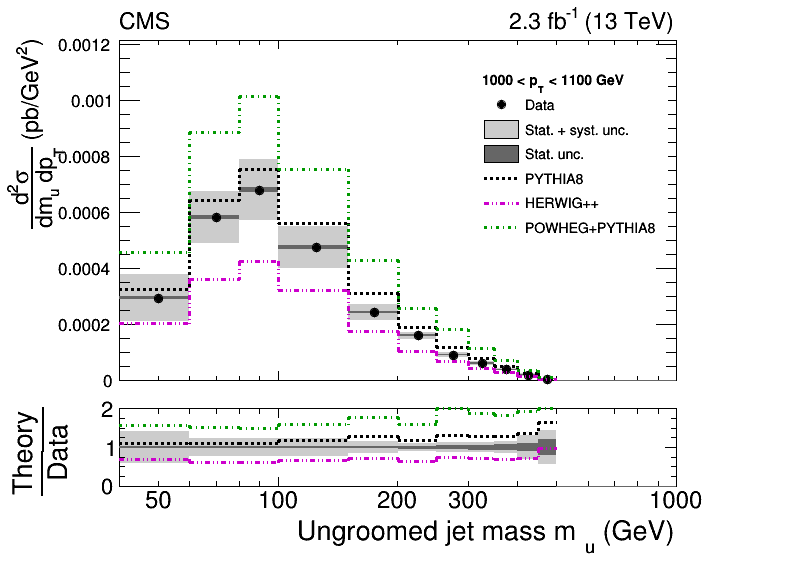

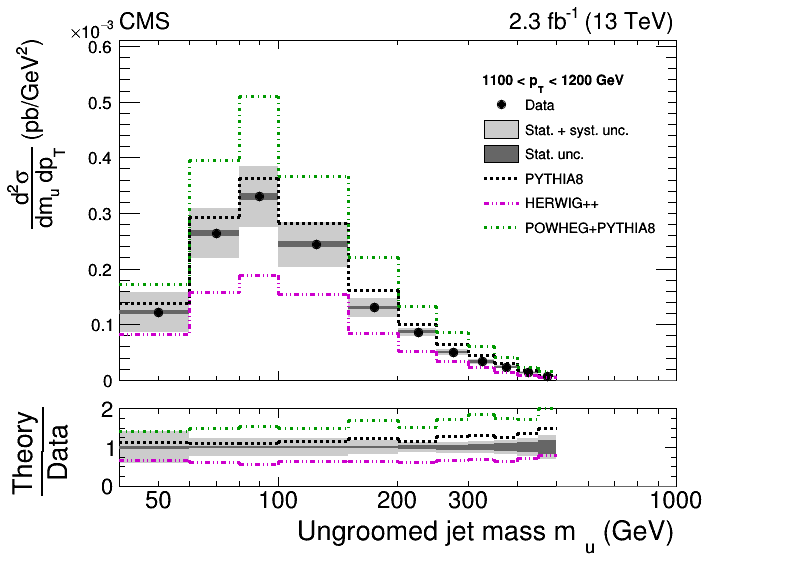

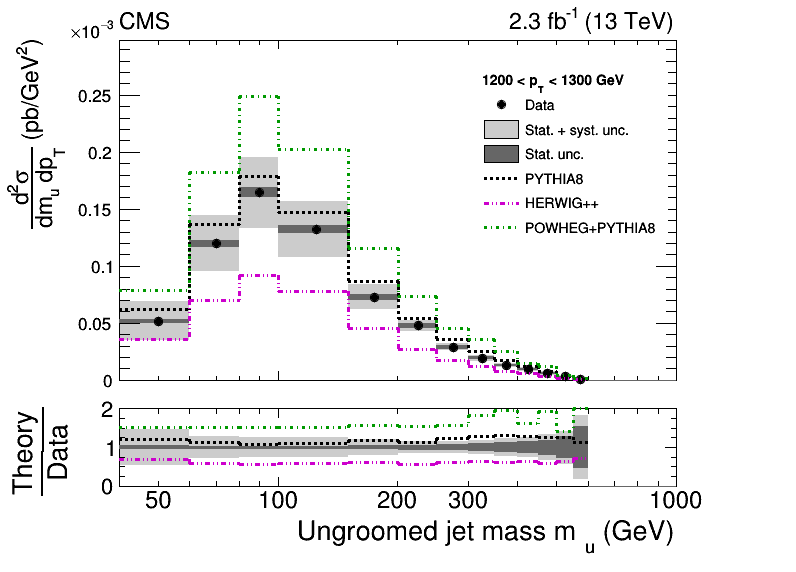

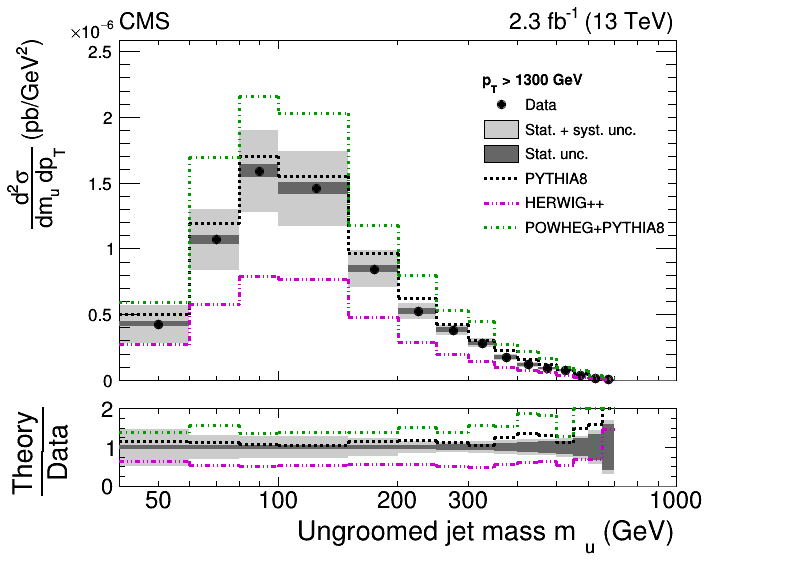

In [3]:
uu = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute") 

print 'data integral:' , uu.nom.Integral() 
print 'pythia integral:' , uu.pythiaHist.Integral()
print 'herwig integral:' , uu.herwigHist.Integral() 

uu.plotFullXSProjections( hists=[uu.nom, uu.nomStat,uu.pythiaHist,uu.herwigHist,uu.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'] )




#### Absolute cross section for groomed jets. 

{'_jec': <ROOT.TH2F object ("2d_response_softdrop_jernom__jec") at 0x7f9abf731c00>, '_pdf': <ROOT.TH2F object ("2d_response_softdrop_nomnom_pdf") at 0x7f9ac1276e00>, '_jmr': <ROOT.TH2F object ("2d_response_softdrop_jmrnom__jmr") at 0x7f9aba79a000>, '_jms': <ROOT.TH2F object ("2d_response_softdrop_jernom__jms") at 0x7f9abf7c4e00>, '_pu': <ROOT.TH2F object ("2d_response_softdrop_jernom__pu") at 0x7f9aba7a4000>, '_mcStat': <ROOT.TH2F object ("2d_response_softdrop_nomnom_mcStat") at 0x7f9abb7ae800>, '_jer': <ROOT.TH2F object ("2d_response_softdrop_jernom__jer") at 0x7f9ac0807e00>, '_ps': <ROOT.TH2F object ("2d_response_softdrop_nomnom_ps") at 0x7f9abeca7e00>, '_lum': <ROOT.TH2F object ("2d_response_softdrop_nomnom_lum") at 0x7f9abec8d600>, '_totunc': None}


Info in <TCanvas::Print>: png file fullxs_absolute_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop1.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop2.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop3.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop4.root has been created
Info

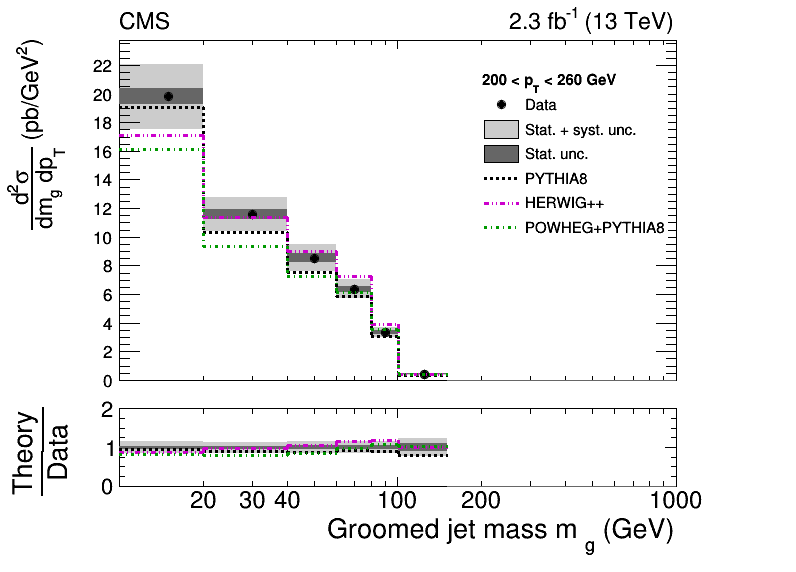

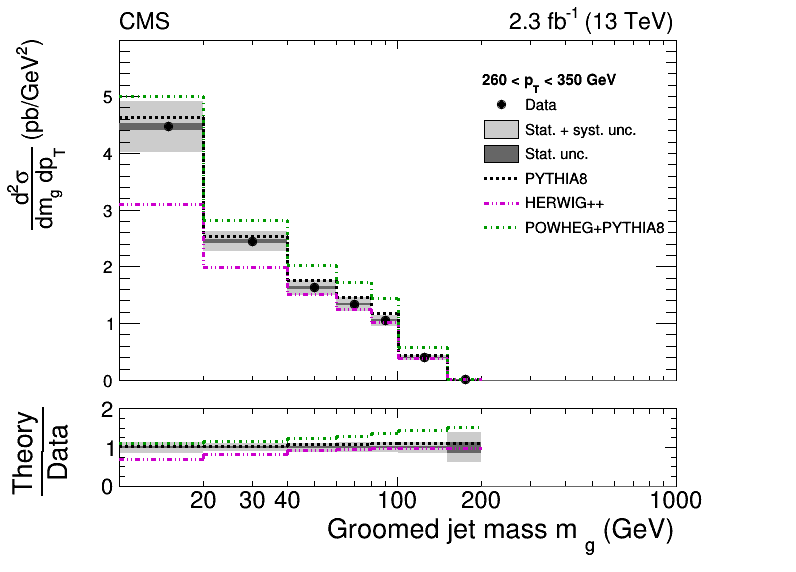

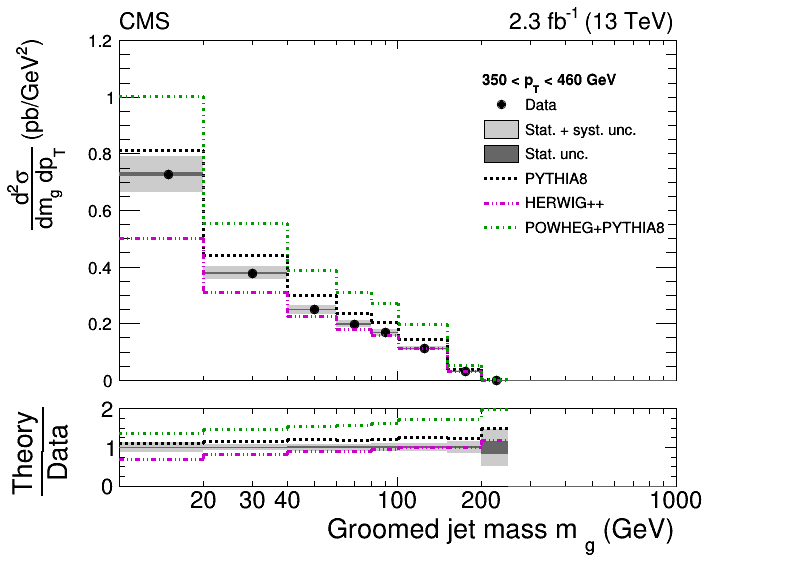

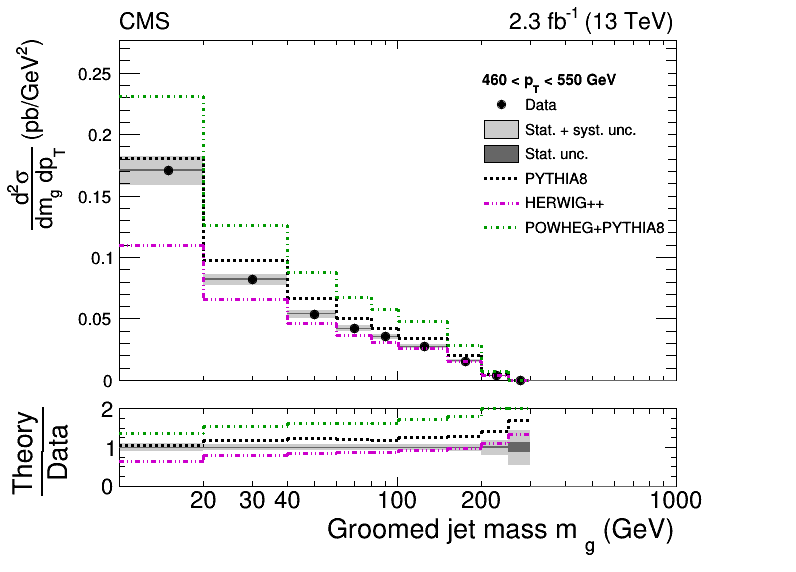

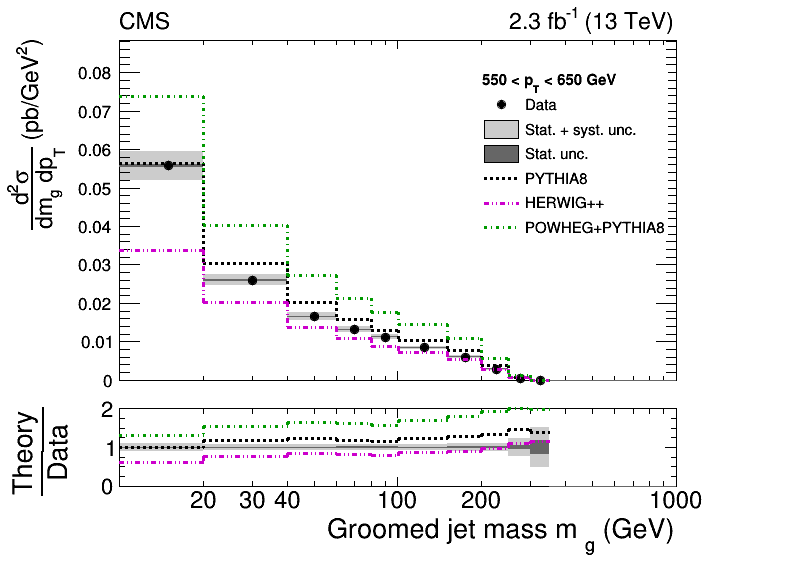

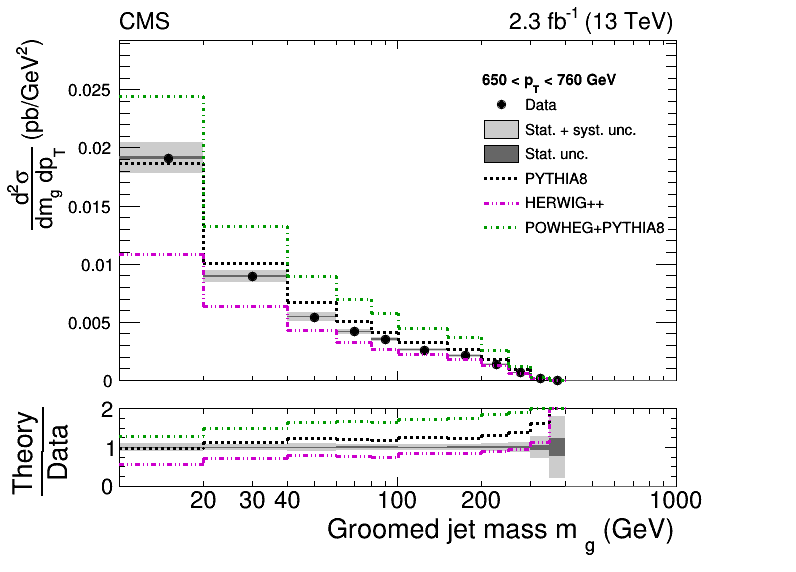

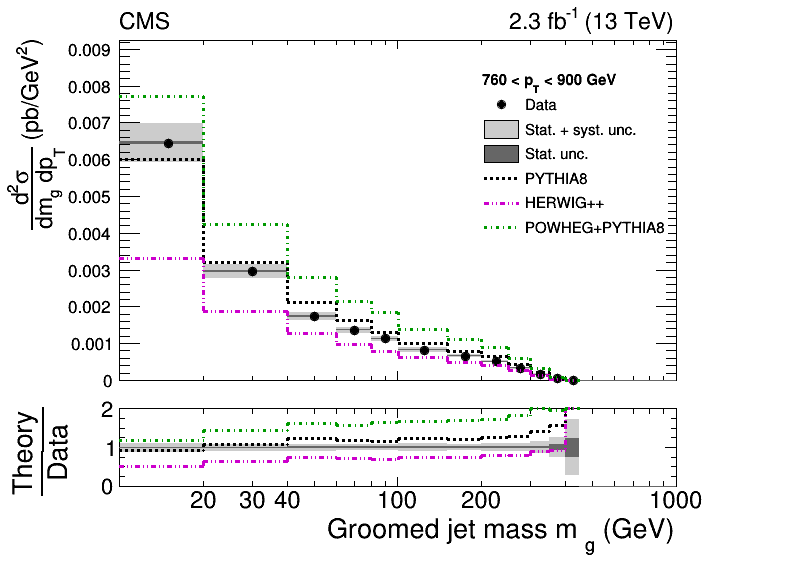

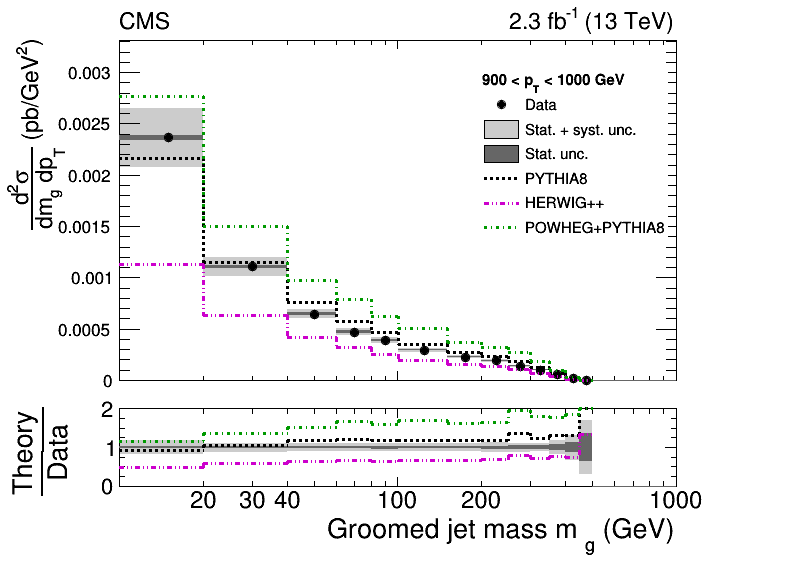

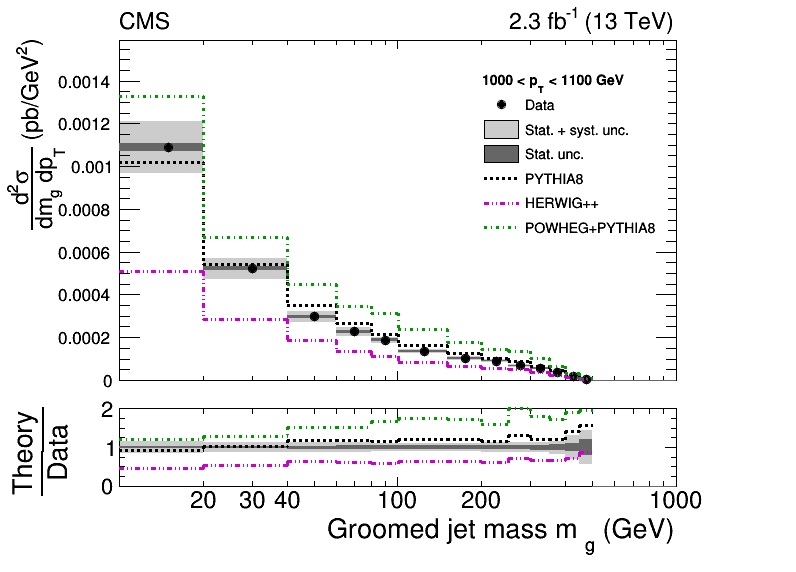

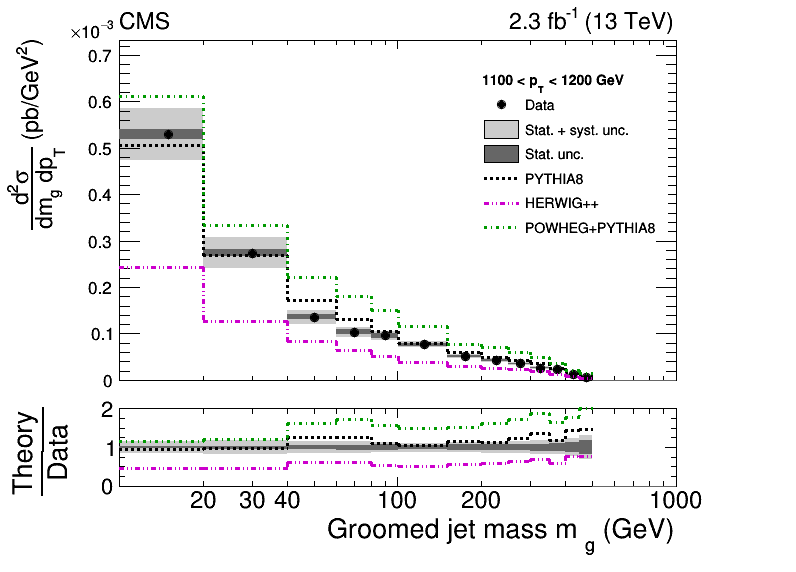

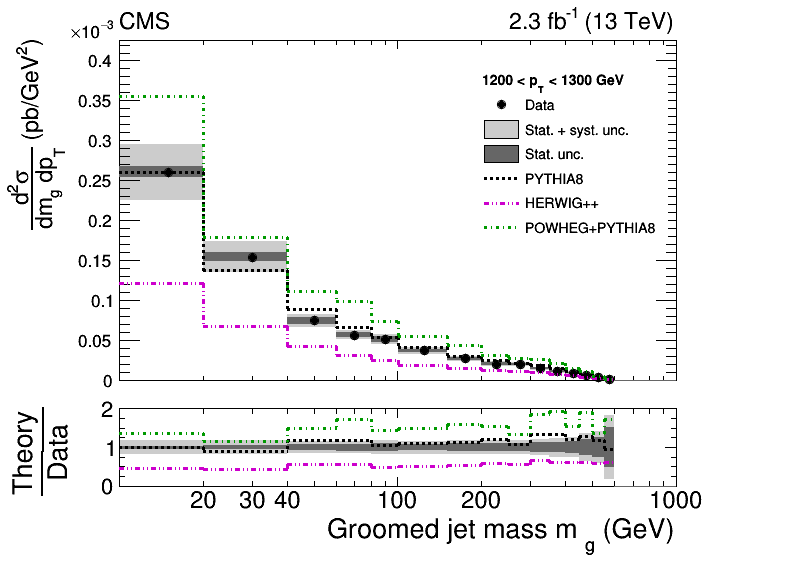

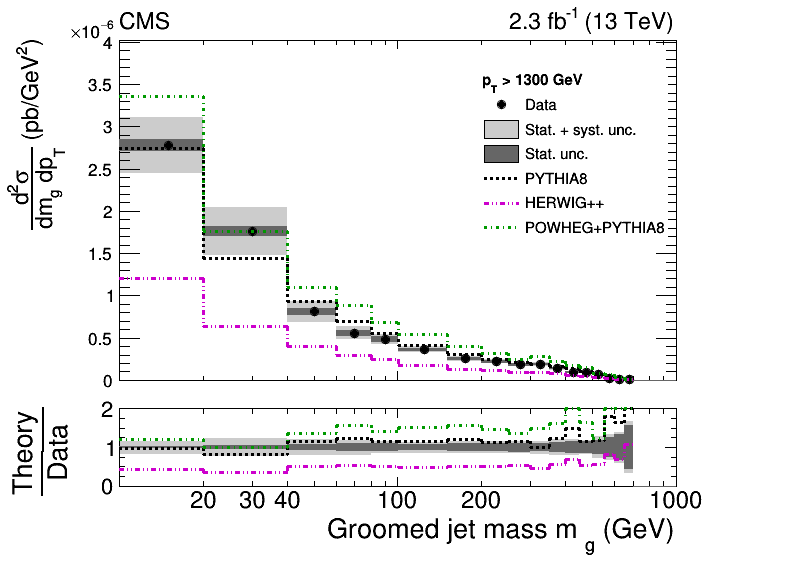

In [4]:

ug = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute_softdrop") 

ug.plotFullXSProjections( hists=[ug.nom, ug.nomStat,ug.pythiaHist,ug.herwigHist,ug.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'] )


#### Absolute cross section wrt pt

Info in <TCanvas::Print>: png file pt_xs.png has been created
Info in <TCanvas::Print>: pdf file pt_xs.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file pt_xs.root has been created


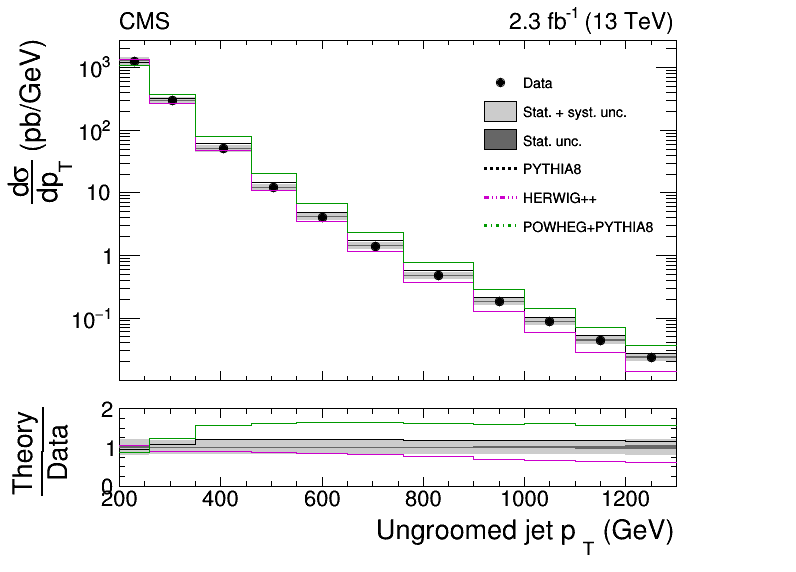

In [5]:
uu.plotPtDist( hists=[uu.nom, uu.nomStat, uu.pythiaHist, uu.herwigHist, uu.powhegHist],
                   styleNames=['nom','nomStat','pythia','herwig', 'powheg'],
                   filename = "pt_xs", title=";Ungroomed jet p_{T} (GeV);#frac{d#sigma}{dp_{T}} (pb/GeV)" )






#### Then plot uncertainties


{'_jec': <ROOT.TH2F object ("2d_response_jernom__jec") at 0x7f9ac08baa00>, '_pdf': <ROOT.TH2F object ("2d_response_nomnom_pdf") at 0x7f9abee77200>, '_jmr': <ROOT.TH2F object ("2d_response_jmrnom__jmr") at 0x7f9ac08f0000>, '_jms': <ROOT.TH2F object ("2d_response_jernom__jms") at 0x7f9ac1304800>, '_pu': <ROOT.TH2F object ("2d_response_jernom__pu") at 0x7f9ac1327000>, '_mcStat': <ROOT.TH2F object ("2d_response_nomnom_mcStat") at 0x7f9ac09f0600>, '_jer': <ROOT.TH2F object ("2d_response_jernom__jer") at 0x7f9ac12d8600>, '_ps': <ROOT.TH2F object ("2d_response_nomnom_ps") at 0x7f9abee7c200>, '_lum': <ROOT.TH2F object ("2d_response_nomnom_lum") at 0x7f9abee1ce00>, '_totunc': None}
{'_jec': <ROOT.TH2F object ("2d_response_softdrop_jernom__jec") at 0x7f9ac0a04000>, '_pdf': <ROOT.TH2F object ("2d_response_softdrop_nomnom_pdf") at 0x7f9ac0b59800>, '_jmr': <ROOT.TH2F object ("2d_response_softdrop_jmrnom__jmr") at 0x7f9ac1977000>, '_jms': <ROOT.TH2F object ("2d_response_softdrop_jernom__jms") at 0x7

Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute1.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute2.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute3.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute4.pdf has been created
I

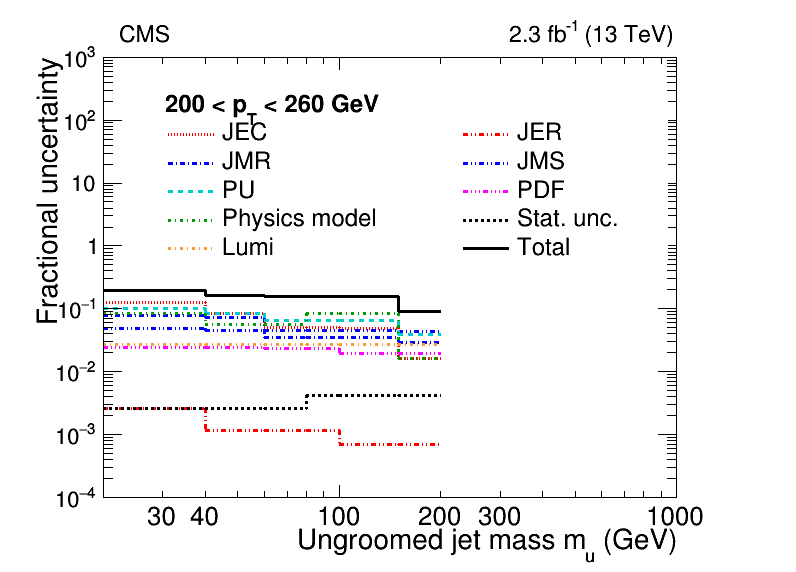

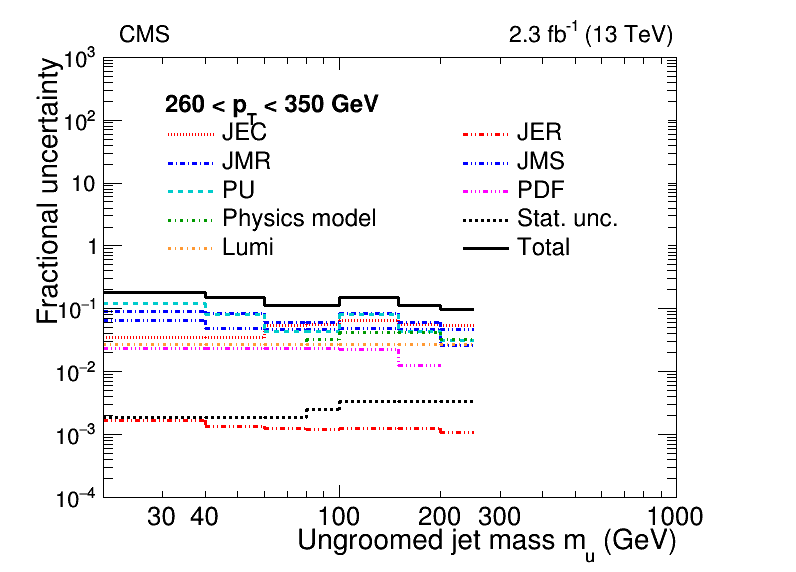

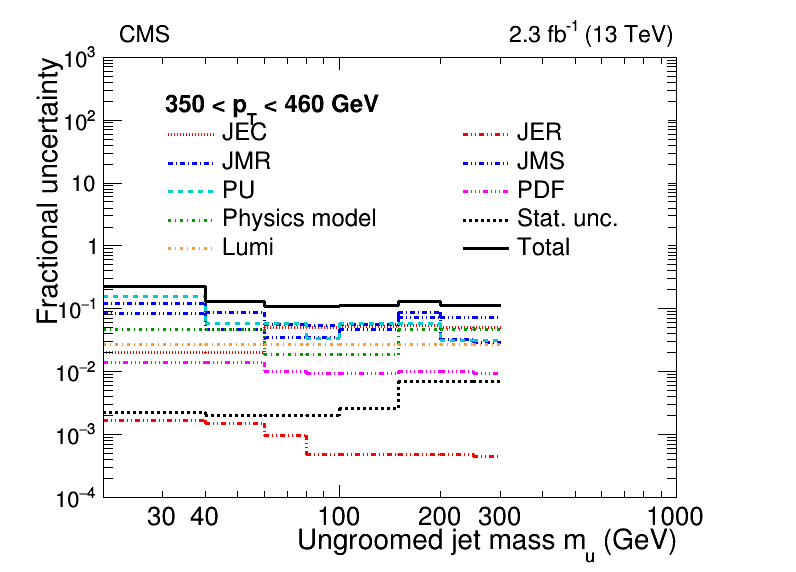

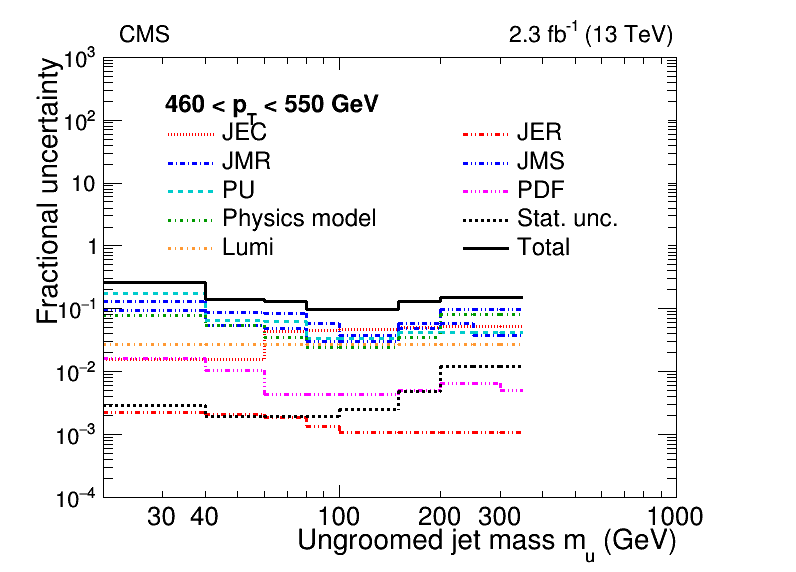

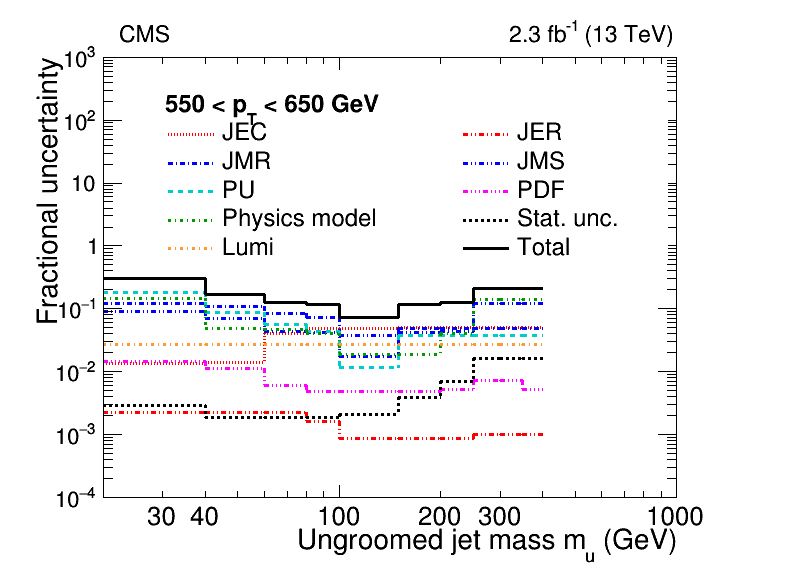

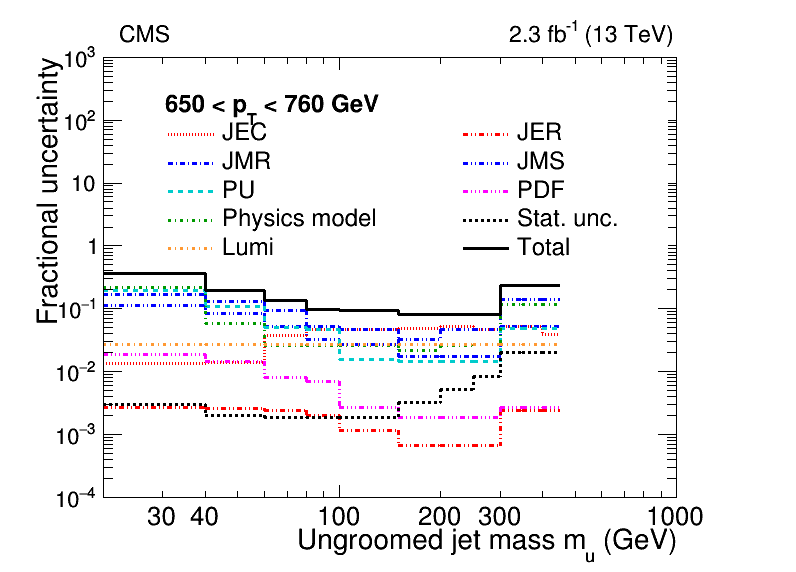

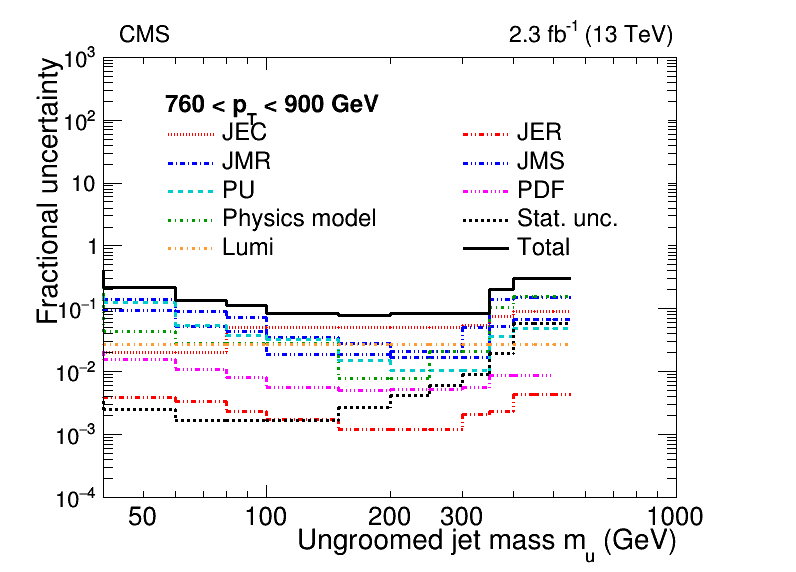

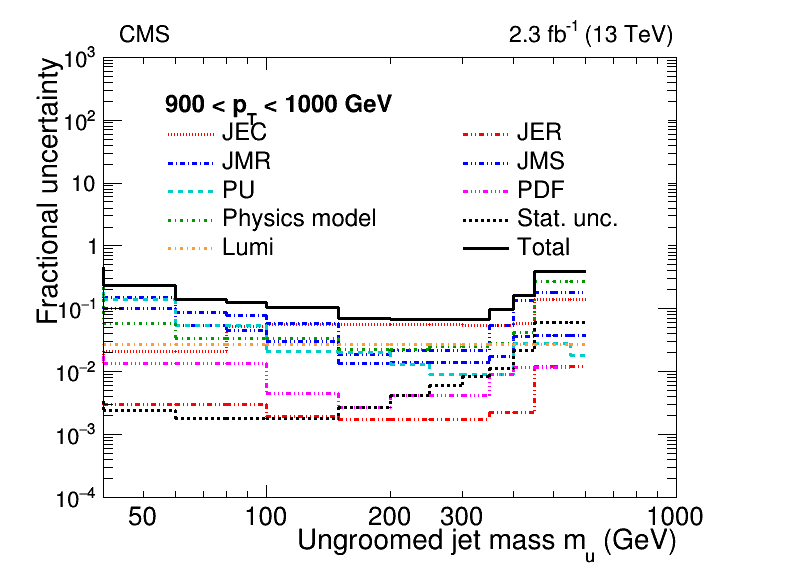

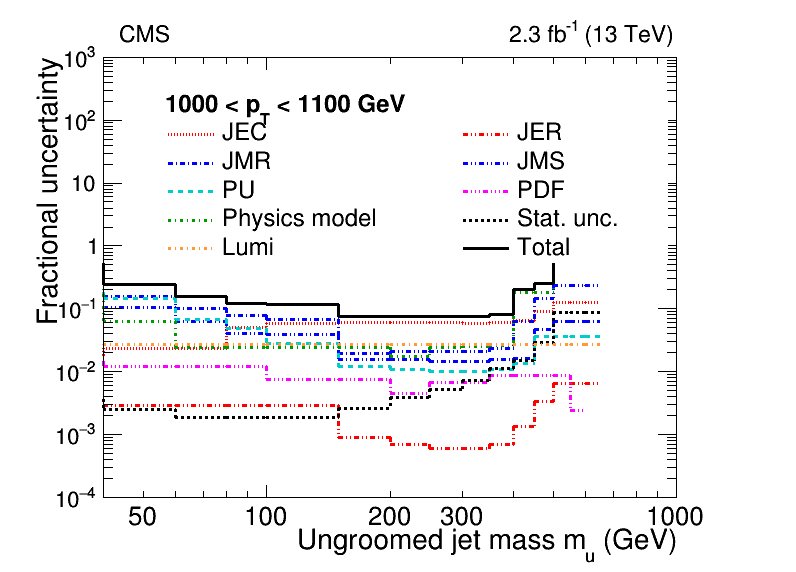

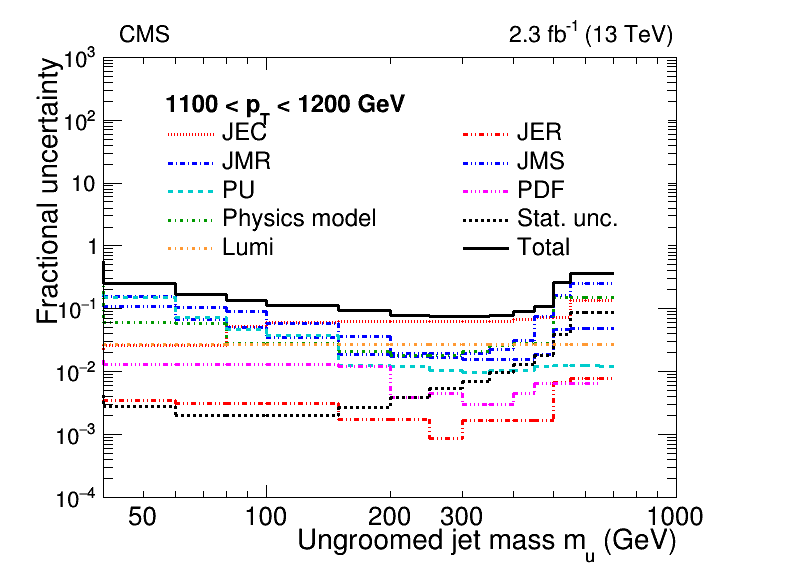

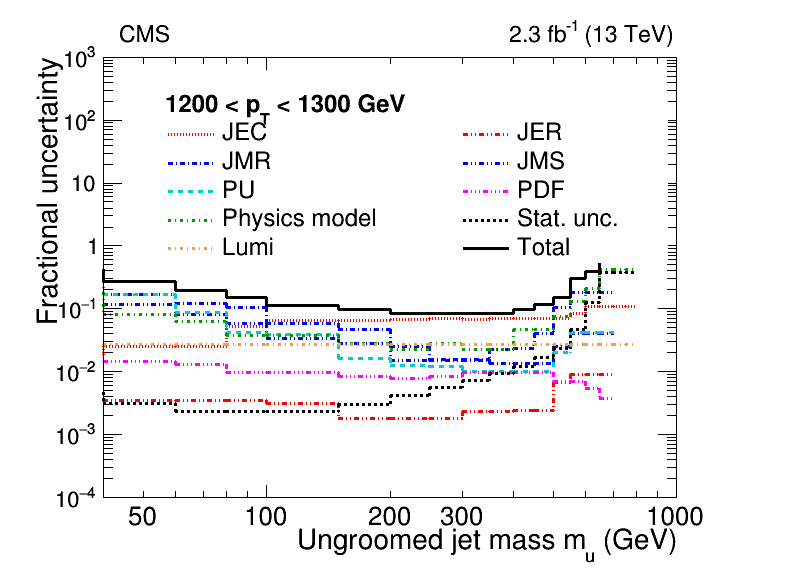

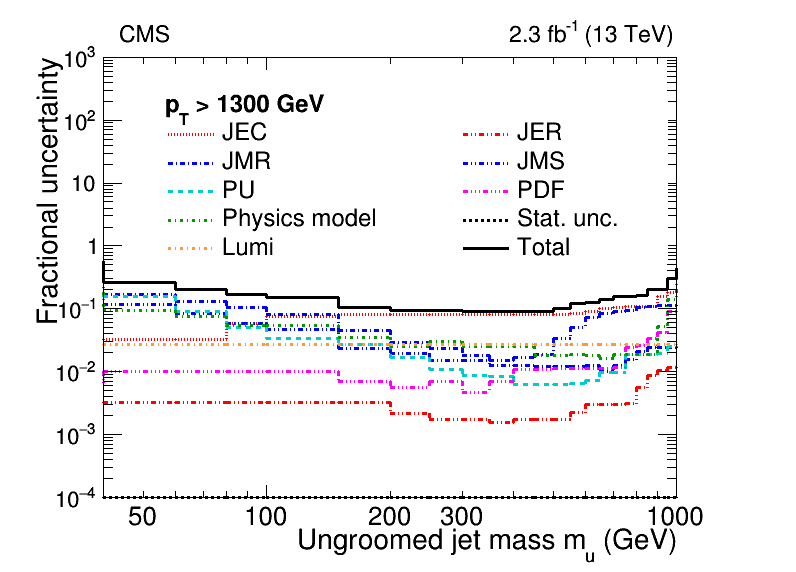

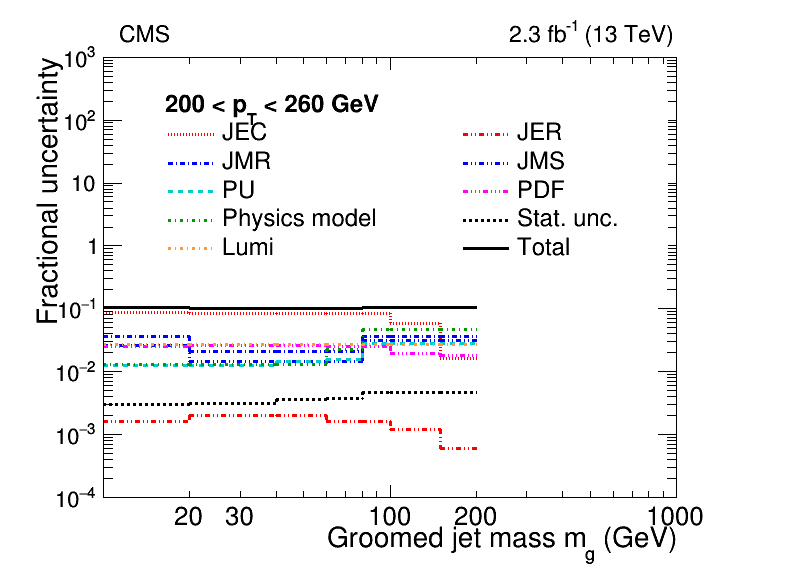

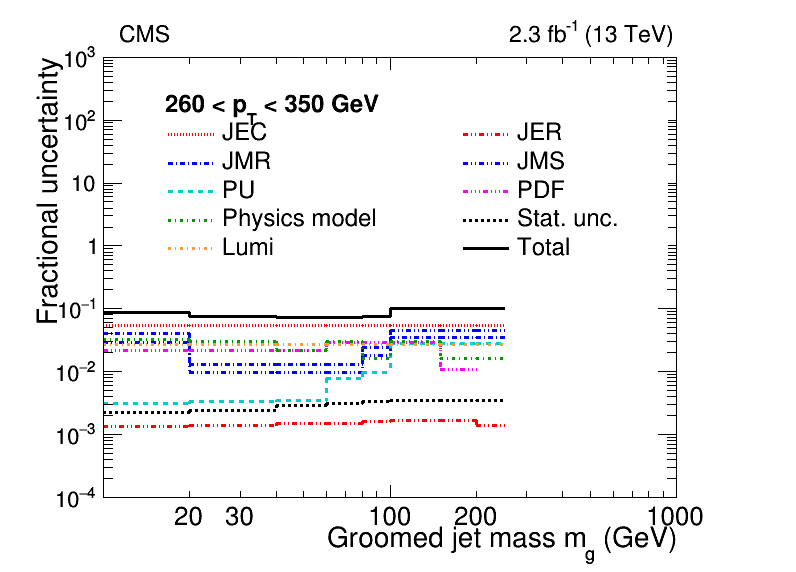

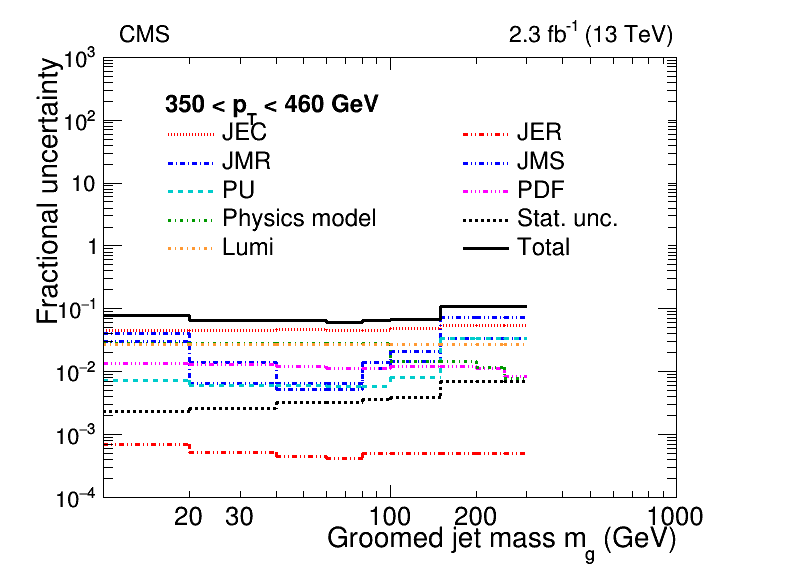

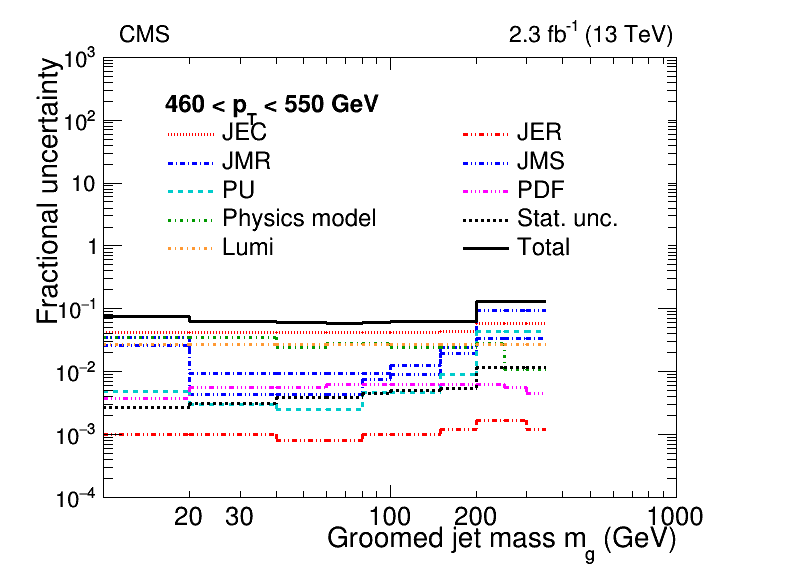

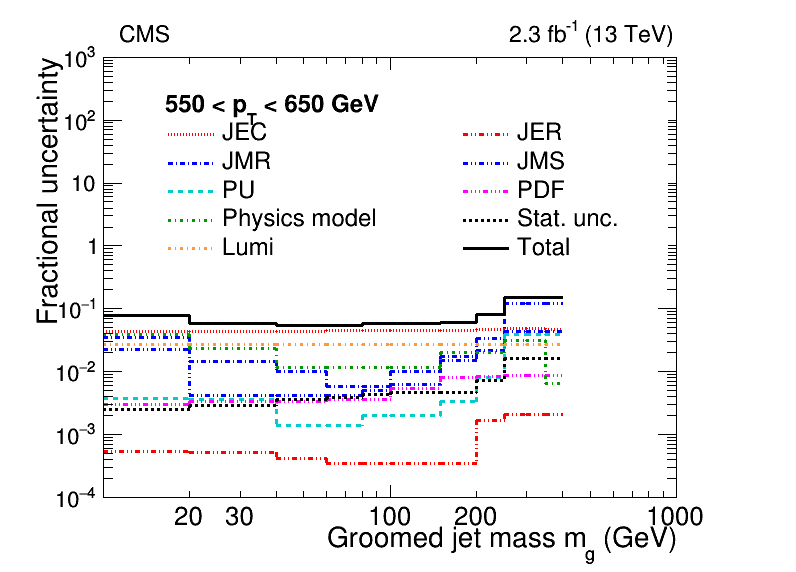

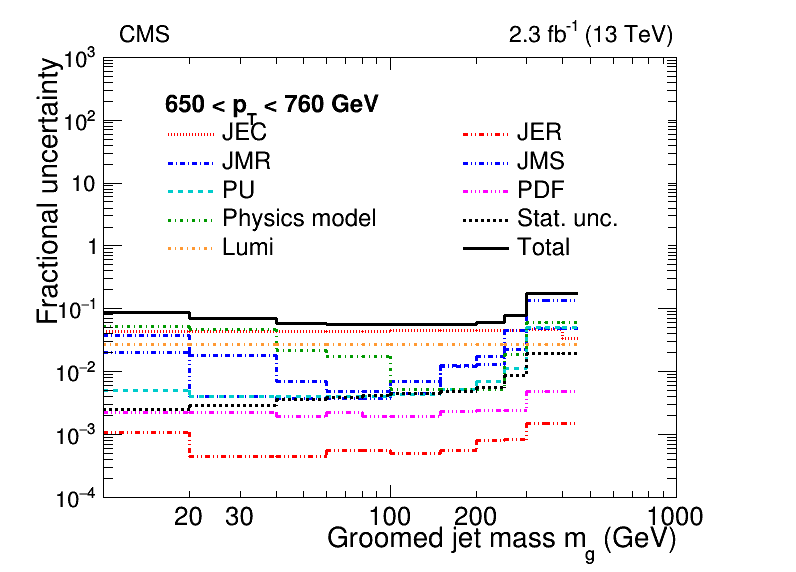

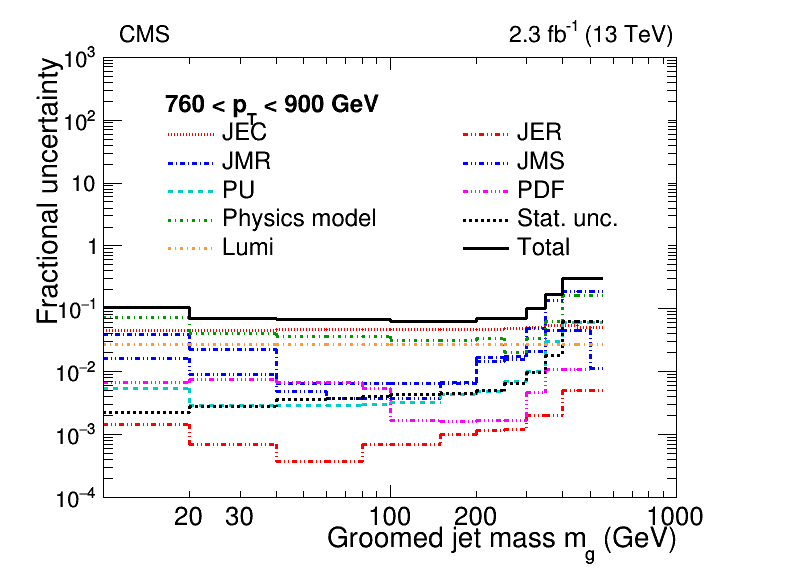

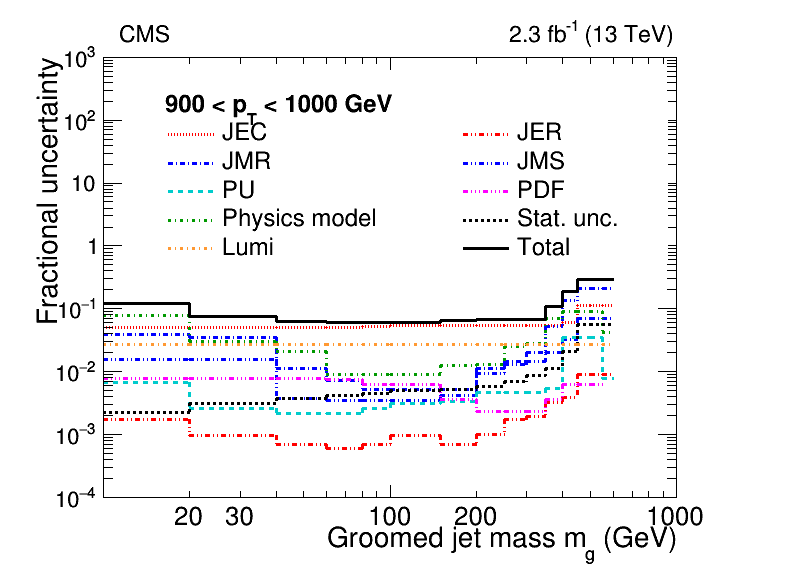

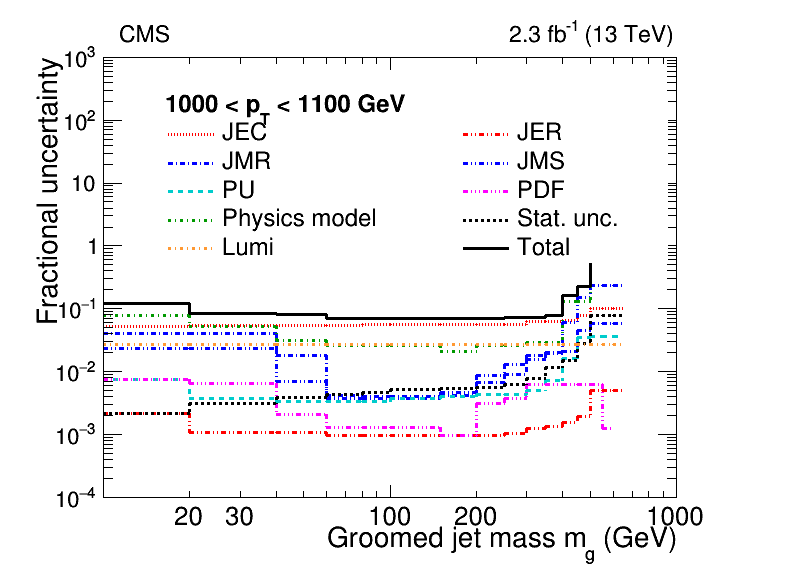

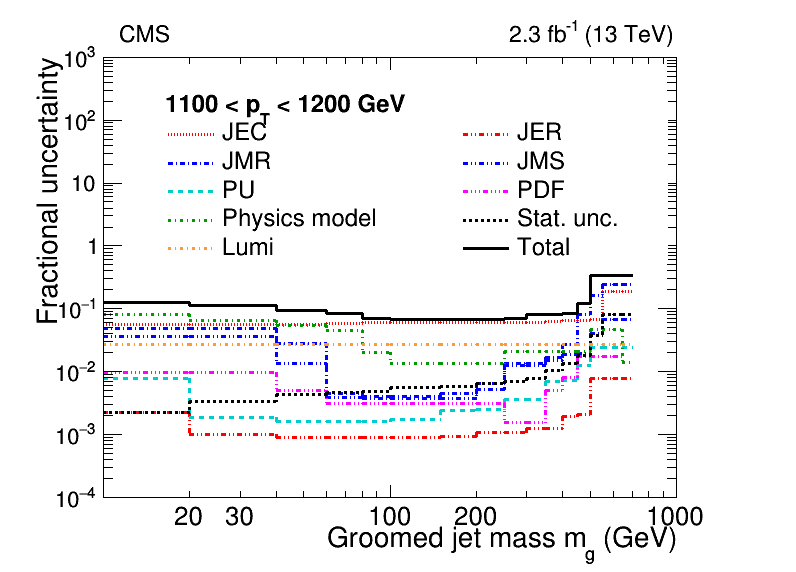

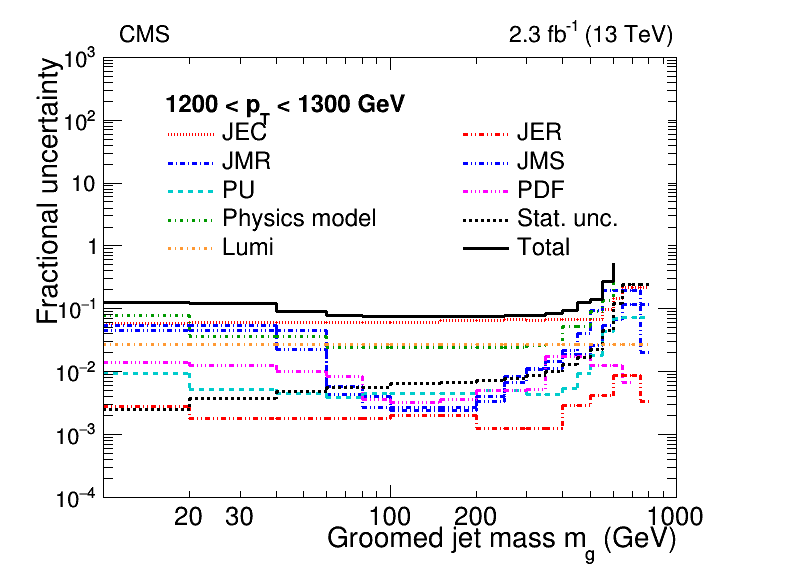

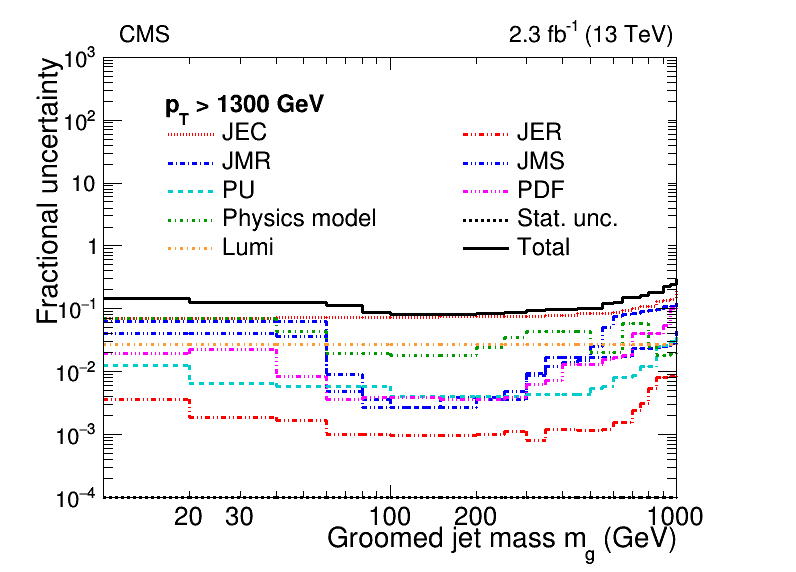

In [6]:
uumc = RooUnfoldUnfolder(useSoftDrop=False,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="ungroomed_absolute")
ugmc = RooUnfoldUnfolder(useSoftDrop=True,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="softdrop_absolute") 

uumc.plotFullUncs( hists=uumc.uncertainties )
ugmc.plotFullUncs( hists=ugmc.uncertainties )




#### Normalized cross section, ungroomed

{'_jec': <ROOT.TH2F object ("2d_response_jernom__jec") at 0x7f9ac0b7b000>, '_pdf': <ROOT.TH2F object ("2d_response_nomnom_pdf") at 0x7f9ac0c7e400>, '_jmr': <ROOT.TH2F object ("2d_response_jmrnom__jmr") at 0x7f9ac1740200>, '_jms': <ROOT.TH2F object ("2d_response_jernom__jms") at 0x7f9ac1770a00>, '_pu': <ROOT.TH2F object ("2d_response_jernom__pu") at 0x7f9ac1771000>, '_mcStat': <ROOT.TH2F object ("2d_response_nomnom_mcStat") at 0x7f9ac0c86200>, '_jer': <ROOT.TH2F object ("2d_response_jernom__jer") at 0x7f9ac1b27200>, '_ps': <ROOT.TH2F object ("2d_response_nomnom_ps") at 0x7f9ac0c85000>, '_totunc': None}


Info in <TCanvas::Print>: png file fullxs_normalized1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized1.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized2.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized3.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized4.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized5.png has been created
Info in <TCan

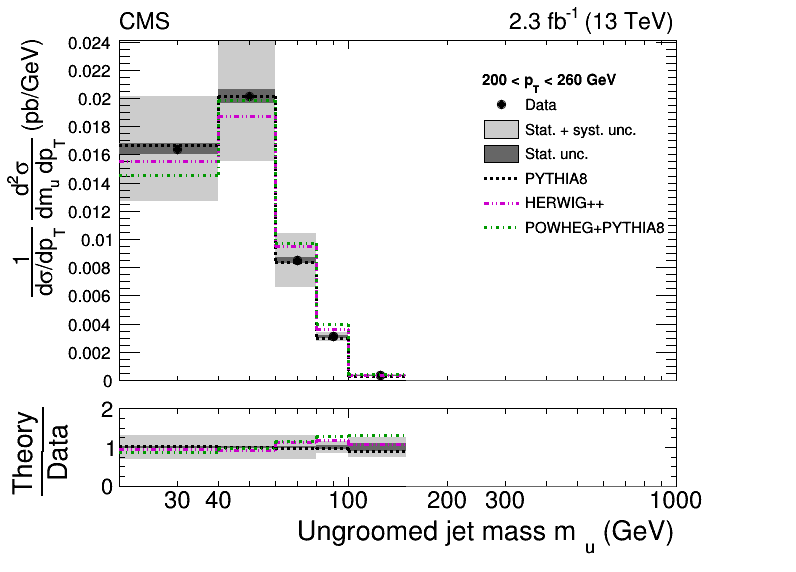

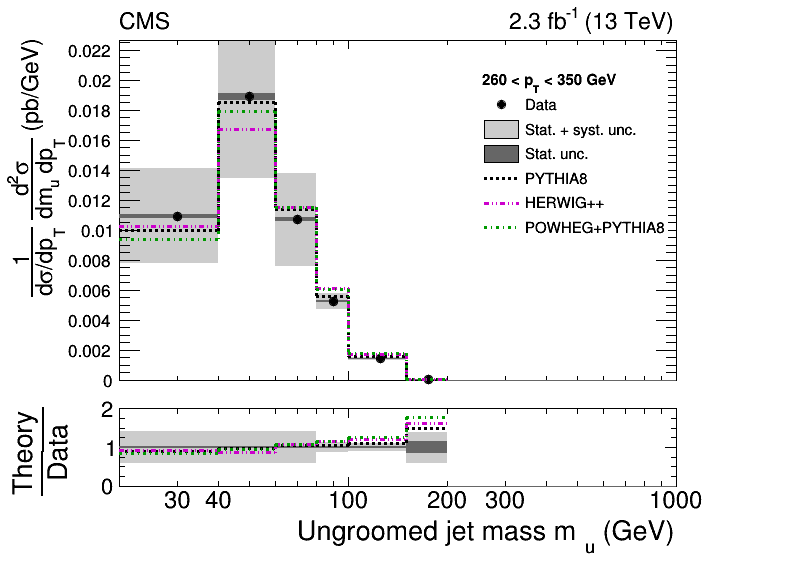

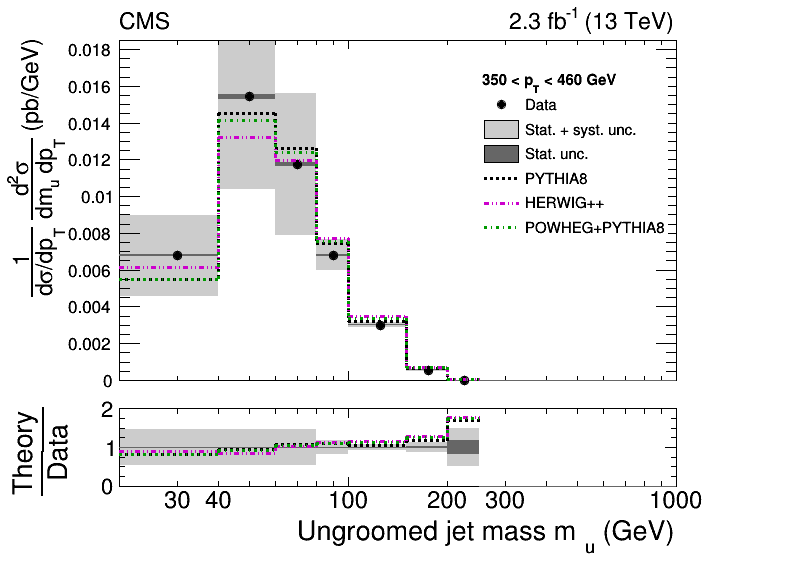

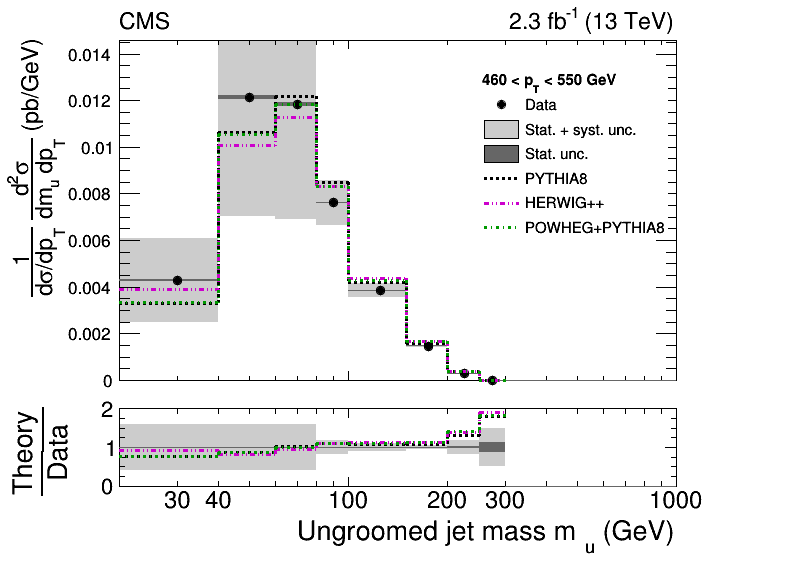

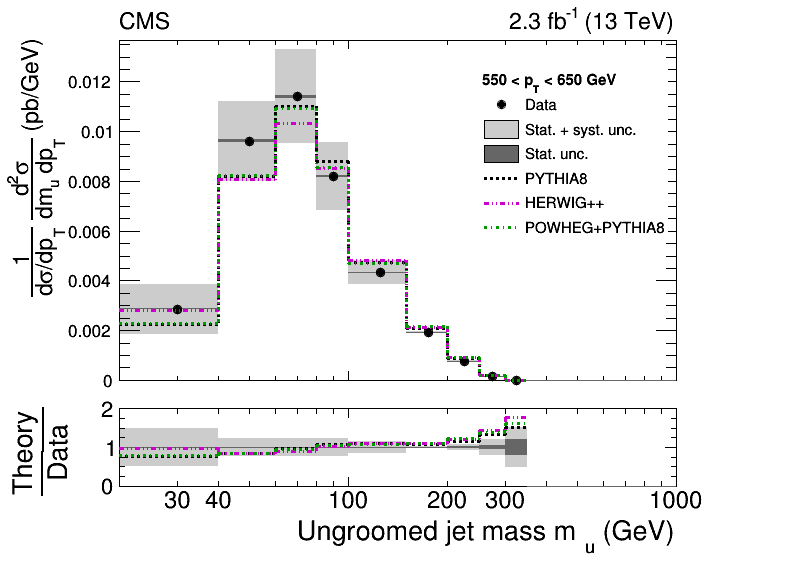

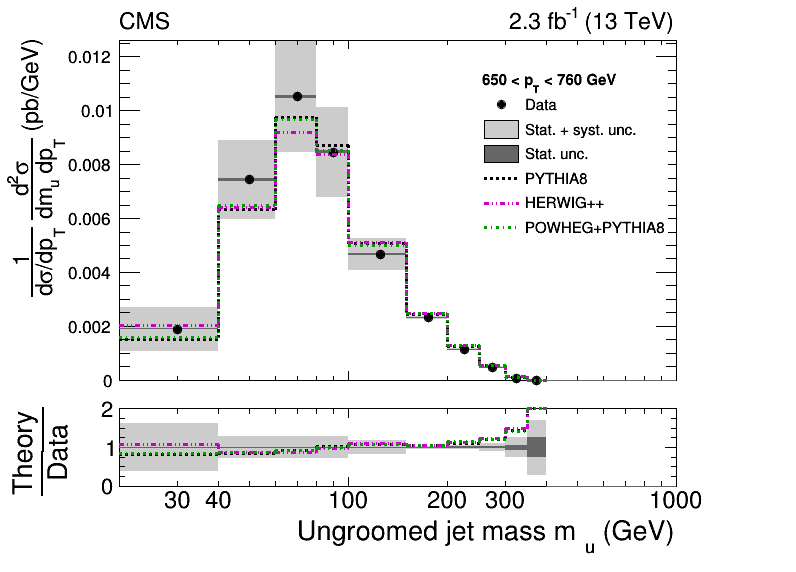

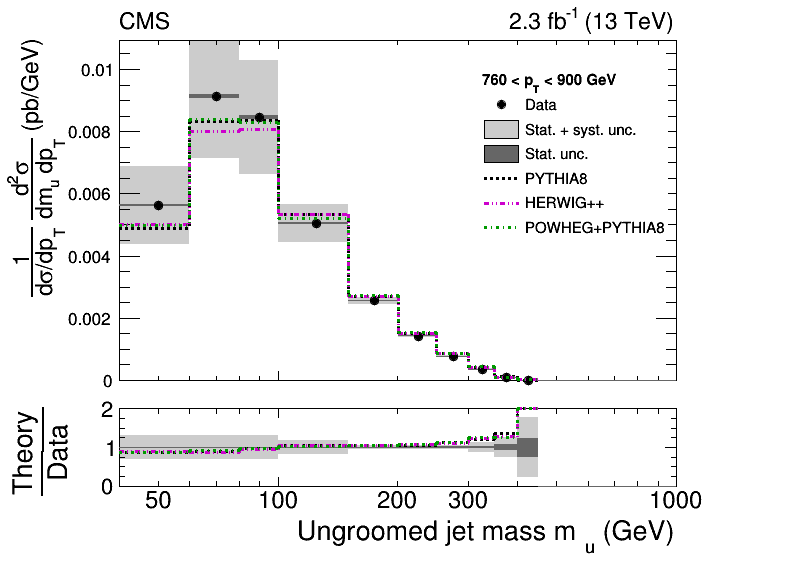

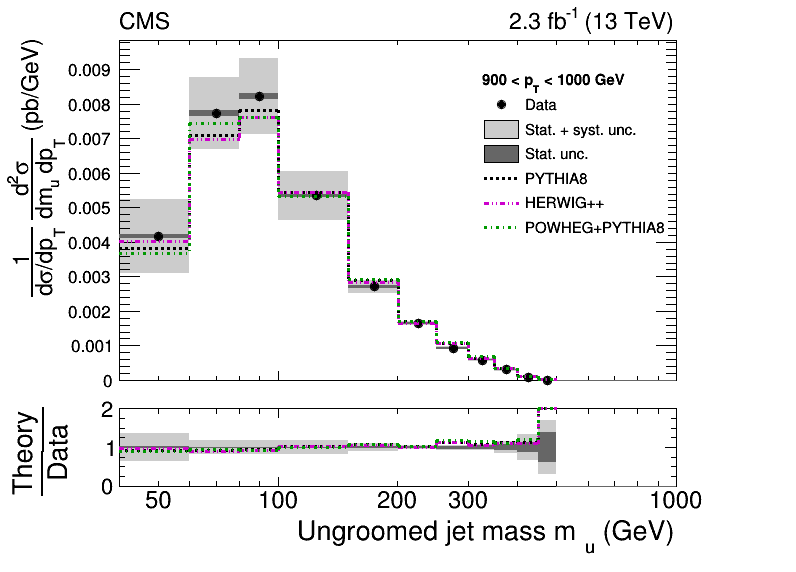

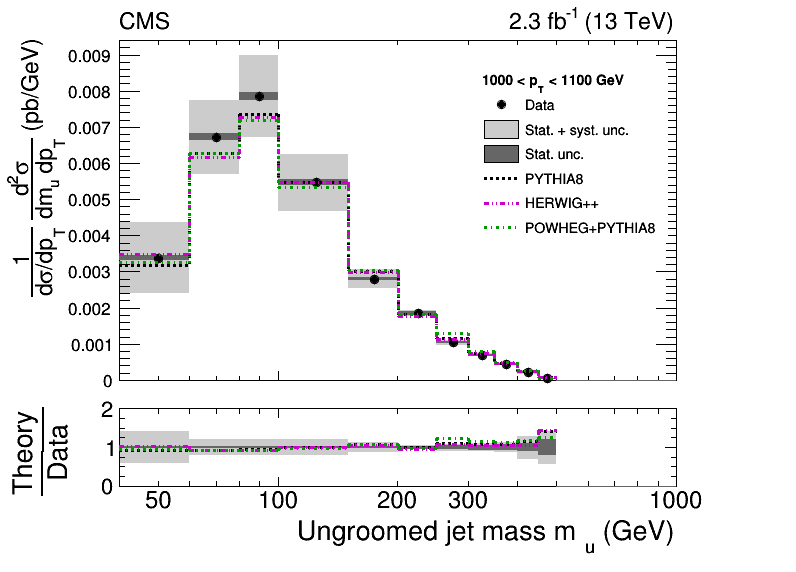

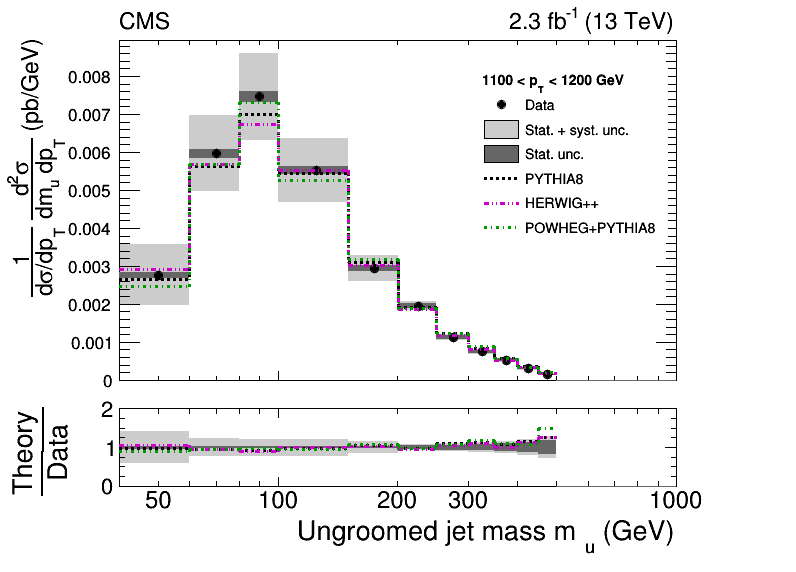

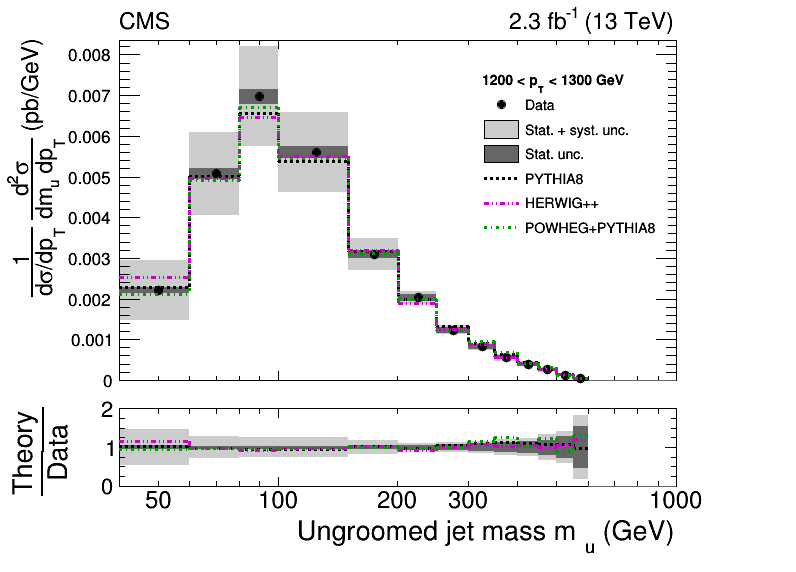

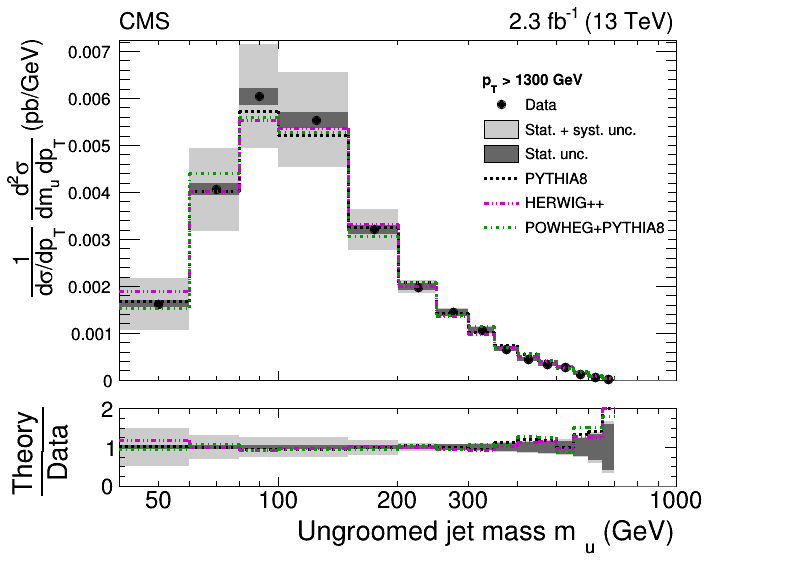

In [7]:
# Now normalized cross section
uu_norm = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized")

uu_norm.plotFullXSProjections( hists=[uu_norm.nom, uu_norm.nomStat,uu_norm.pythiaHist,uu_norm.herwigHist,uu_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'] )


Info in <TCanvas::Print>: png file fullxs_normalized1_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized1_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized1_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized2_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized2_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized2_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized3_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized3_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized3_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized4_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized4_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized4_

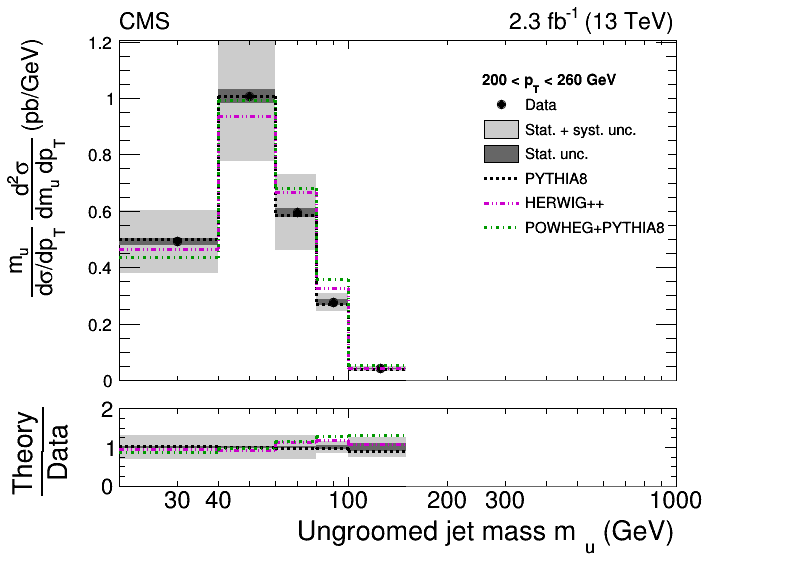

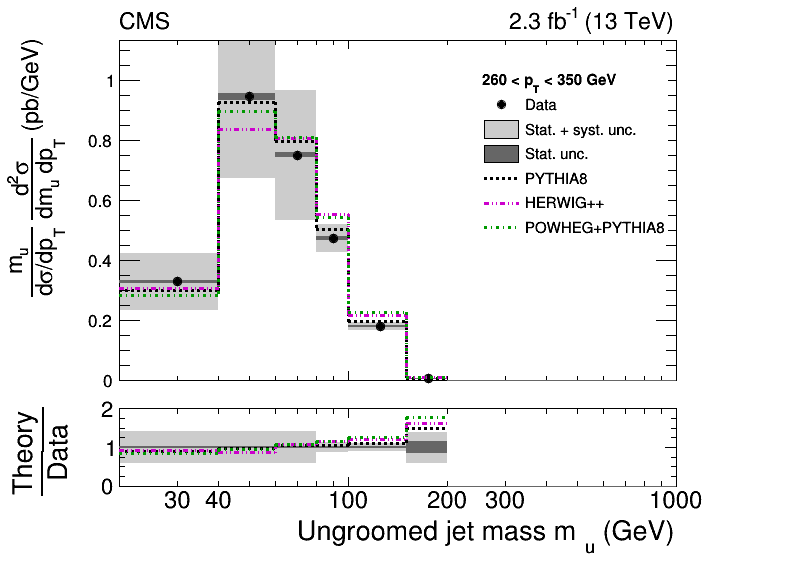

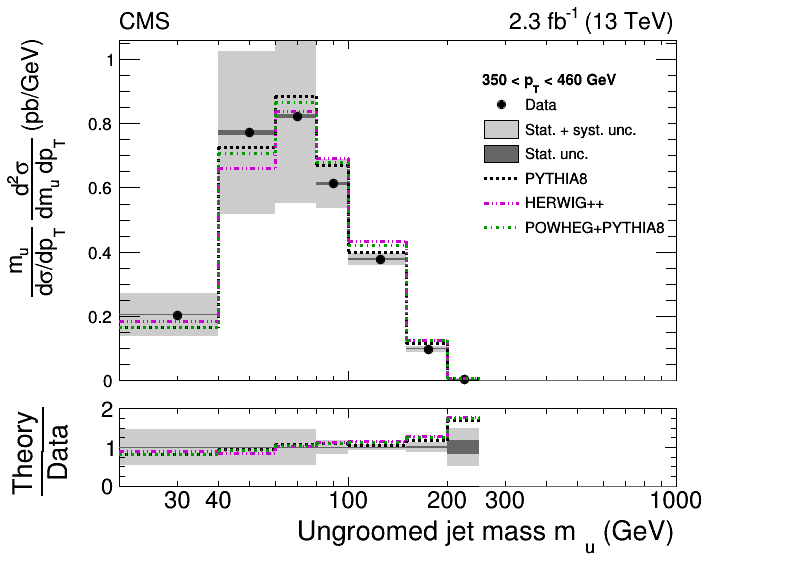

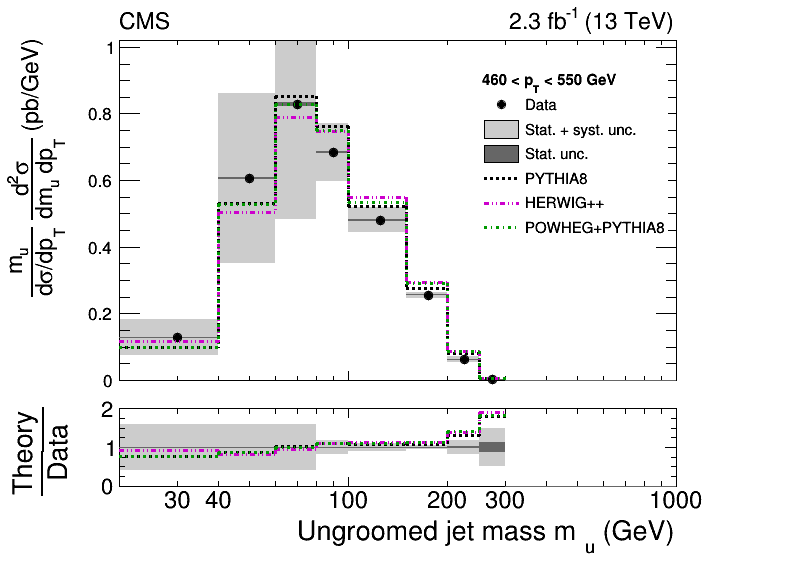

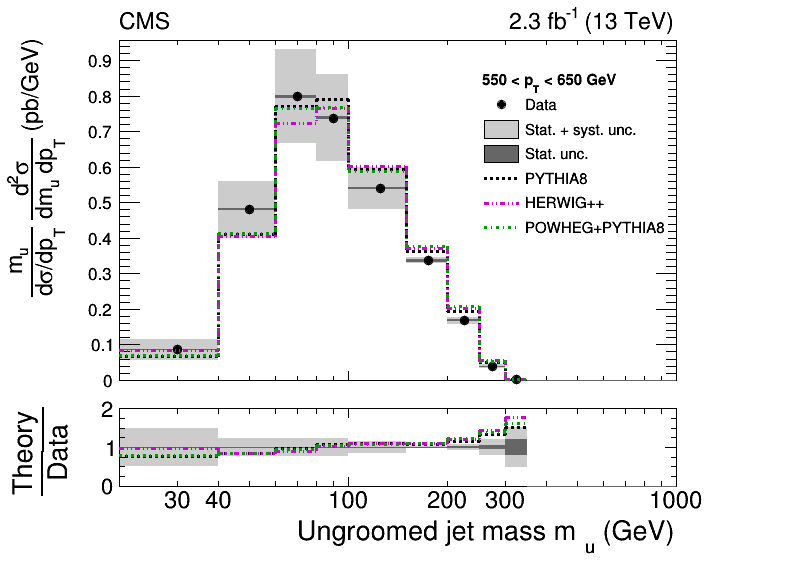

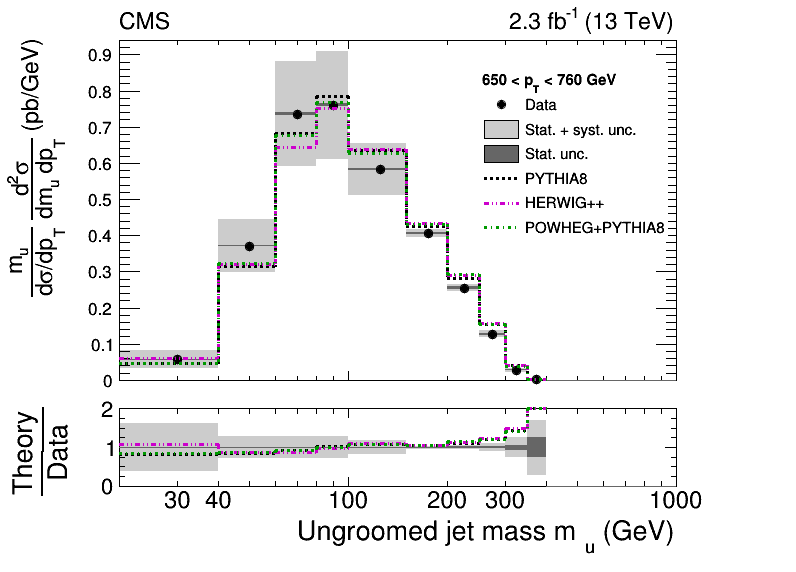

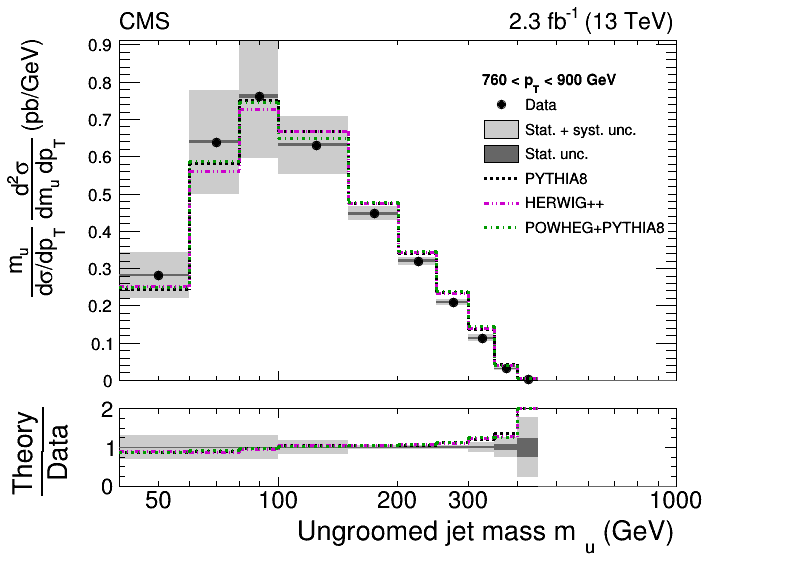

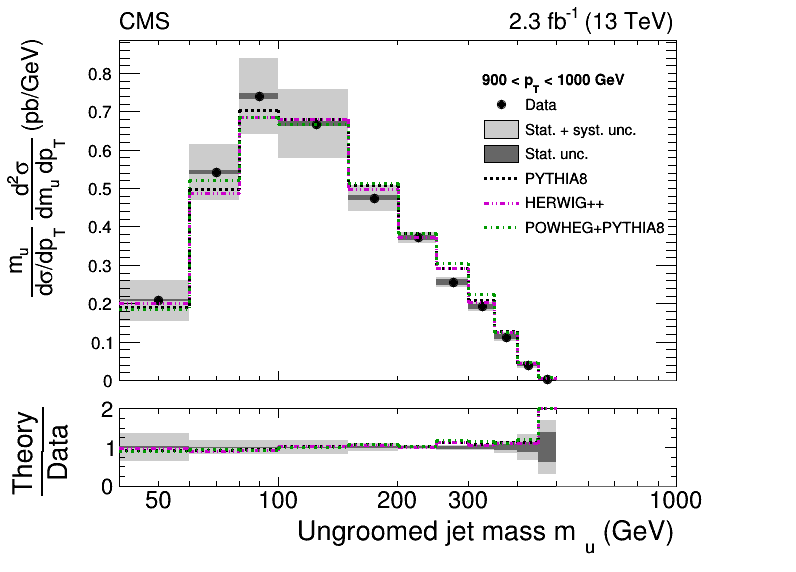

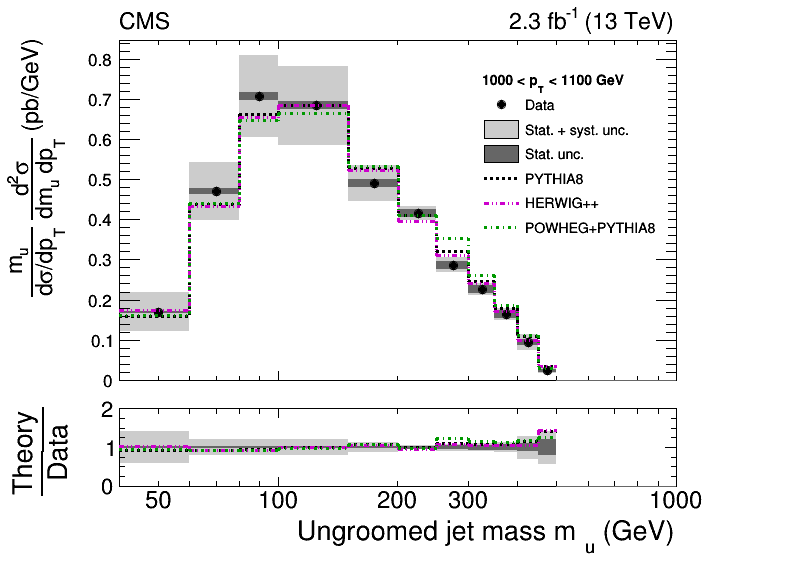

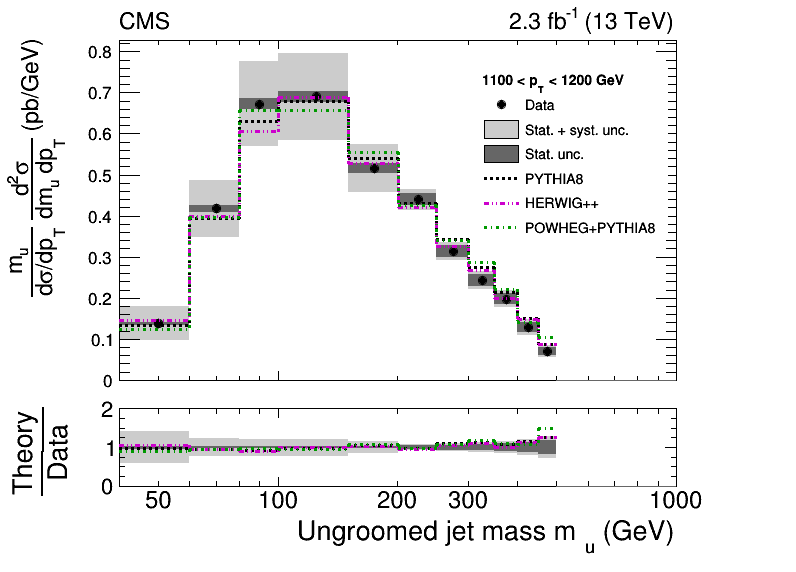

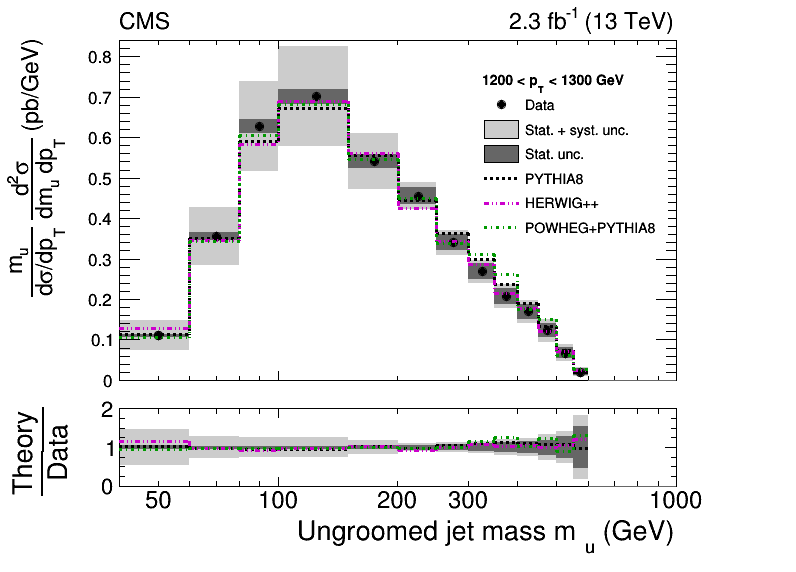

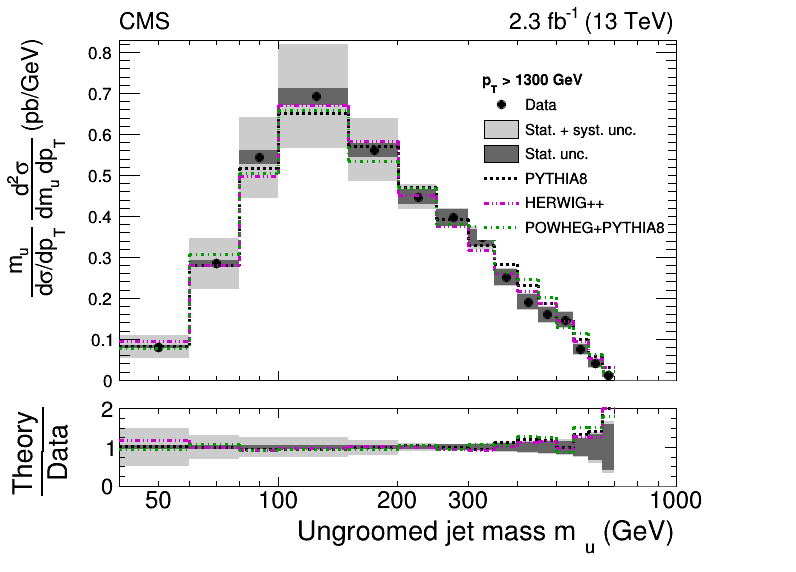

In [8]:
uu_norm.plotFullXSProjections( hists=[uu_norm.nom, uu_norm.nomStat,uu_norm.pythiaHist,uu_norm.herwigHist,uu_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'], plotlogm=True )



#### Normalized cross section, groomed

{'_jec': <ROOT.TH2F object ("2d_response_softdrop_jernom__jec") at 0x7f9ac21b2000>, '_pdf': <ROOT.TH2F object ("2d_response_softdrop_nomnom_pdf") at 0x7f9ac1dc9400>, '_jmr': <ROOT.TH2F object ("2d_response_softdrop_jmrnom__jmr") at 0x7f9ac1c8da00>, '_jms': <ROOT.TH2F object ("2d_response_softdrop_jernom__jms") at 0x7f9ac0cd0e00>, '_pu': <ROOT.TH2F object ("2d_response_softdrop_jernom__pu") at 0x7f9ac1c95200>, '_mcStat': <ROOT.TH2F object ("2d_response_softdrop_nomnom_mcStat") at 0x7f9ac1d88000>, '_jer': <ROOT.TH2F object ("2d_response_softdrop_jernom__jer") at 0x7f9ac1c86200>, '_ps': <ROOT.TH2F object ("2d_response_softdrop_nomnom_ps") at 0x7f9ac0d33c00>, '_totunc': None}


Info in <TCanvas::Print>: png file fullxs_normalized_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop1.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop2.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop3.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop4.ro

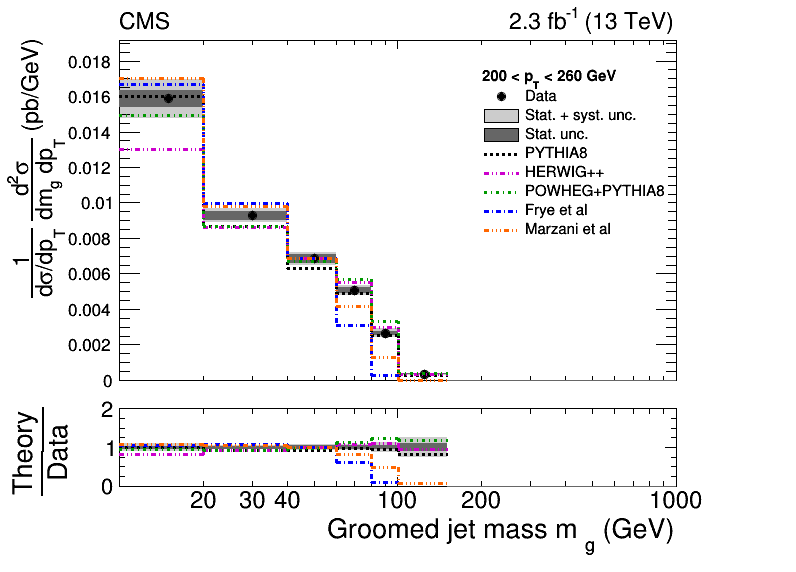

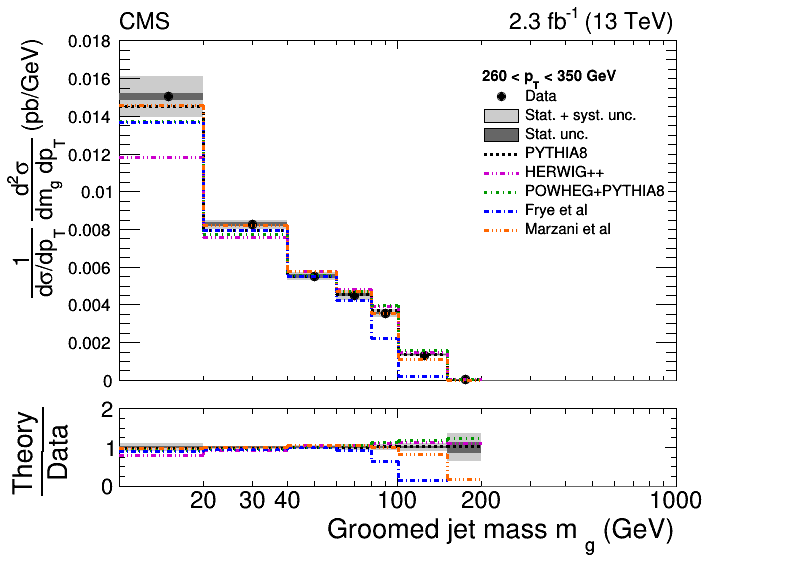

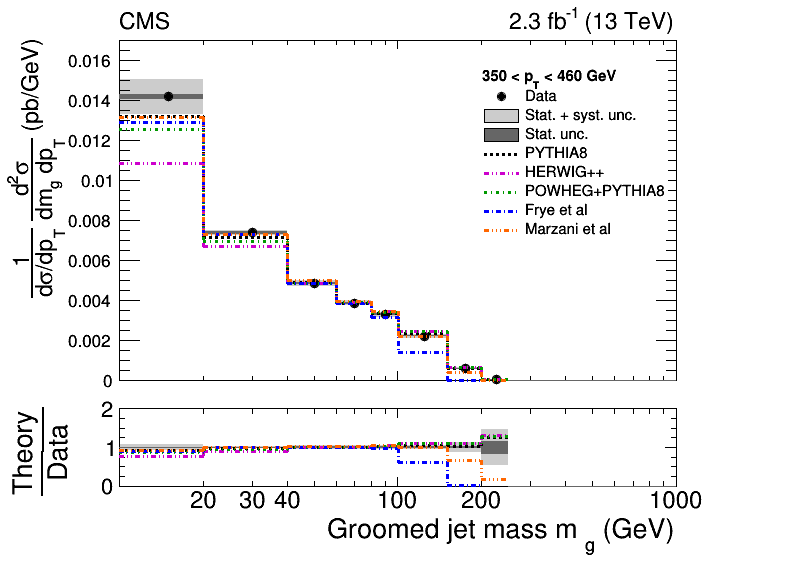

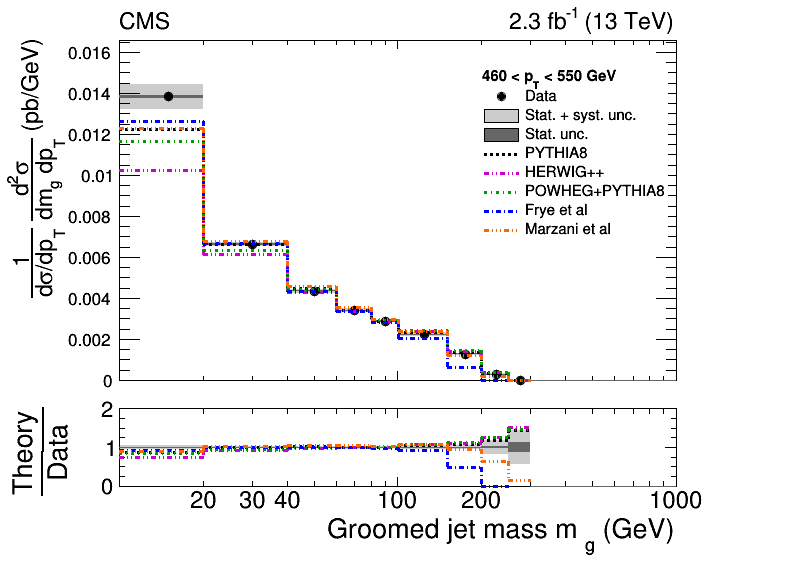

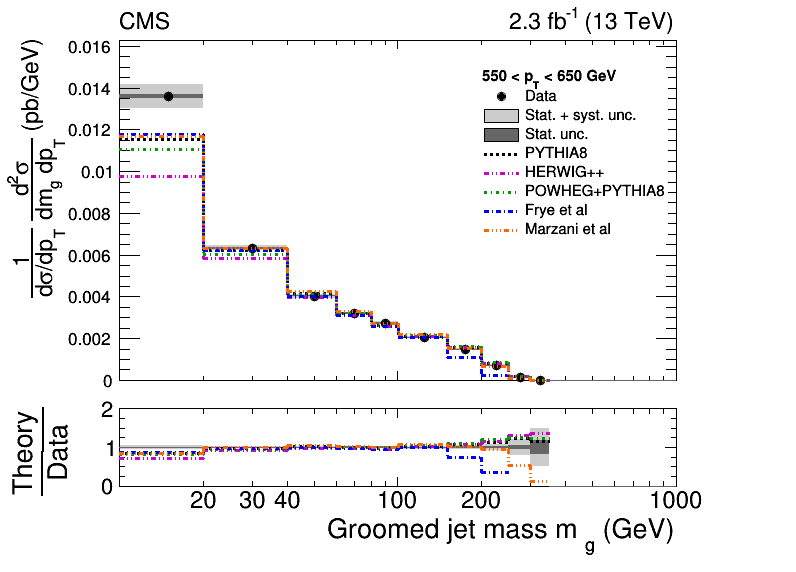

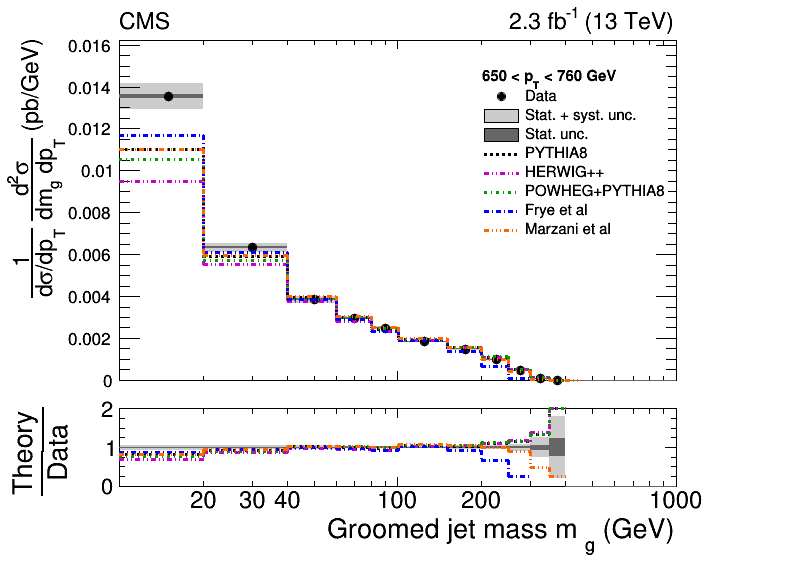

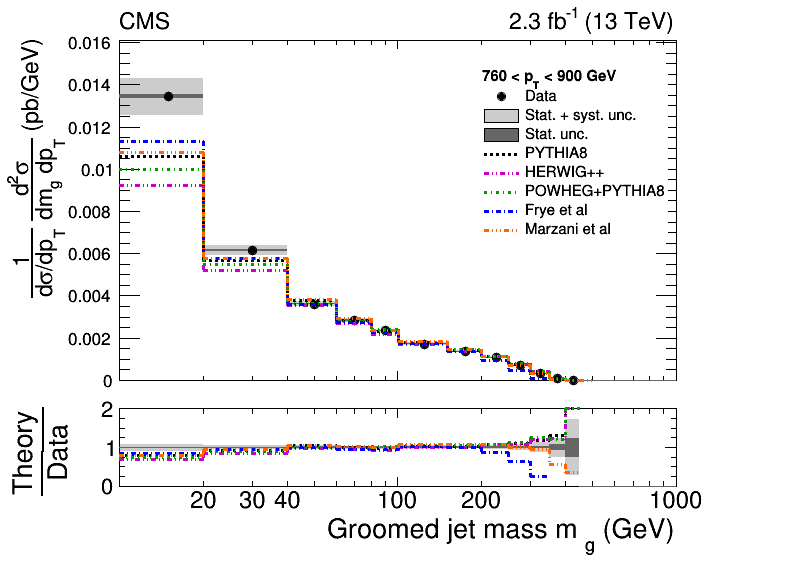

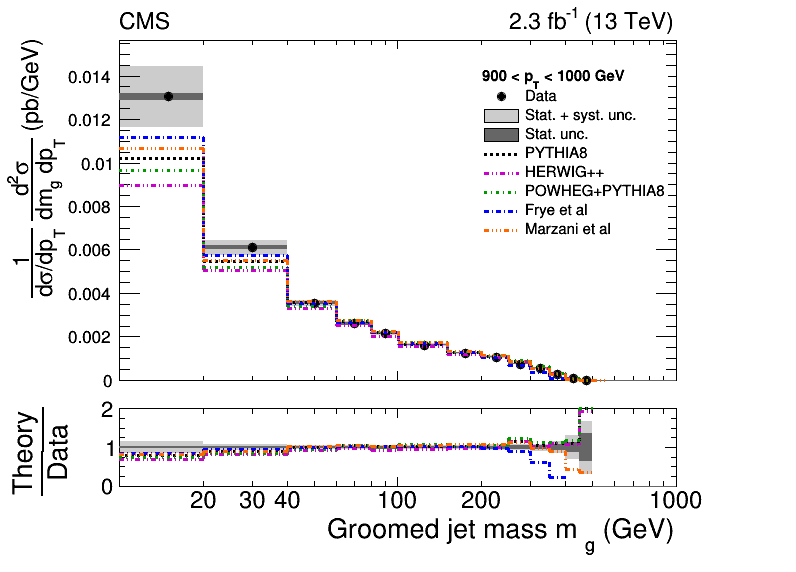

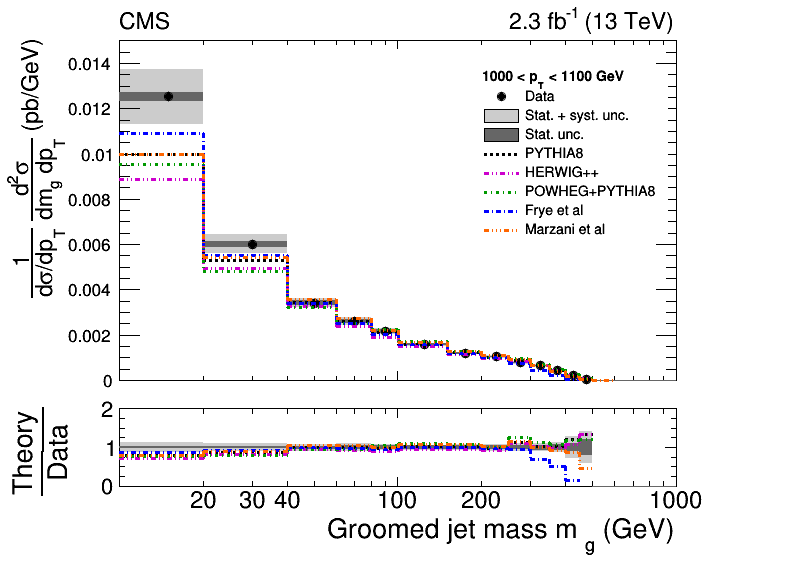

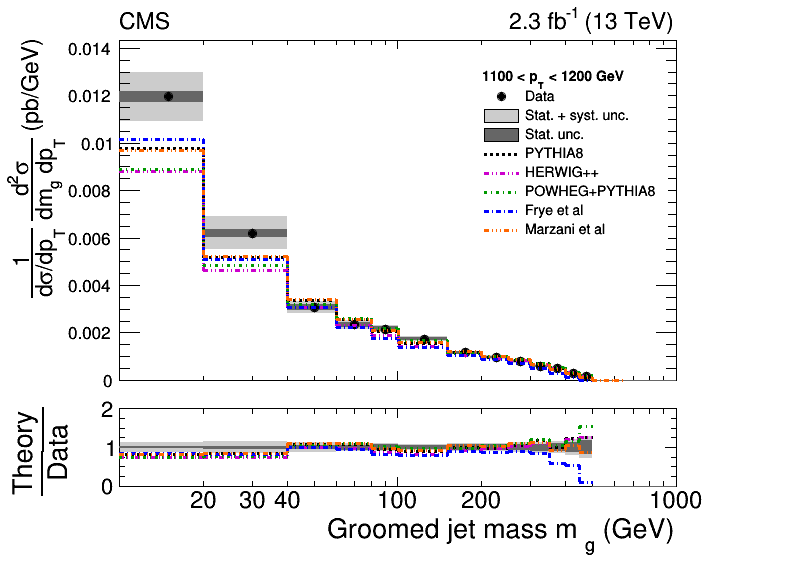

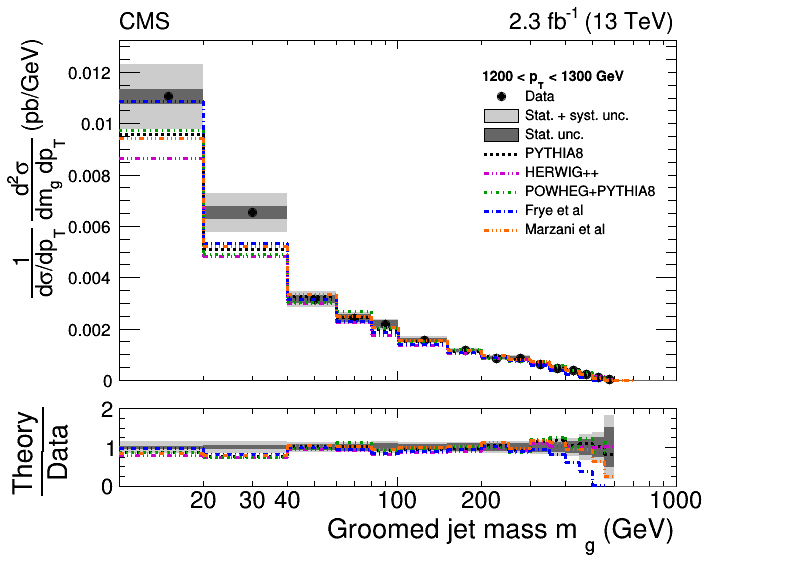

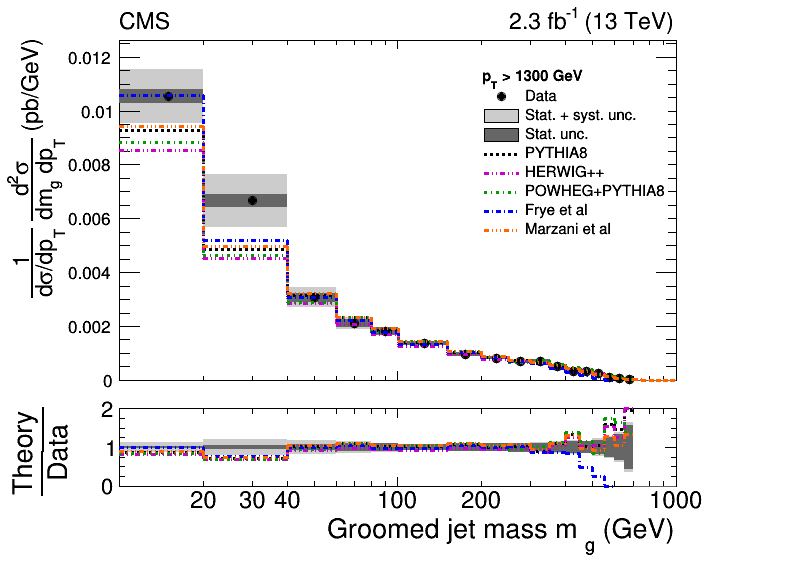

In [9]:

ug_norm = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root", 
                       theoryInputs1="theory_predictions.root", 
                       theoryInputs2="theory_predictions_marzani_newpred.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized_softdrop")

ug_norm.plotFullXSProjections( hists=[ug_norm.nom, ug_norm.nomStat,
                                      ug_norm.pythiaHist,ug_norm.herwigHist,ug_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'],
                              theorycurves=['theory1', 'theory2']                            
                             )




In [10]:


ug_norm.plotFullXSProjections( hists=[ug_norm.nom, ug_norm.nomStat,
                                      ug_norm.pythiaHist,ug_norm.herwigHist,ug_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'],
                              theorycurves=['theory1', 'theory2'],
                              plotlogm=True, legendpos="left"
                             )

TypeError: none of the 2 overloaded methods succeeded. Full details:
  void TPad::Print(const char* filename = "") =>
    takes at most 1 arguments (2 given)
  void TPad::Print(const char* filename, const char* option) =>
    problem in C++; program state has been reset

[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[<unknown binary>] (no debug info)
[/Users/rappoccio/software/root-v6-install/lib/libGpad.so] TPad::Paint(char const*) /Users/rappoccio/software_installs/root-build/include/TList.h:142
[/Users/rappoccio/software/root-v6-install/lib/libGpad.so] TPad::Paint(char const*) /Users/rappoccio/software_installs/root-build/include/TList.h:142
[/Users/rappoccio/software/root-v6-install/lib/libGpad.so] TPad::Print(char const*, char const*) /Users/rappoccio/software_installs/root-v6/graf2d/gpad/src/TPad.cxx:5035
[/Users/rappoccio/software/root-v6-install/lib/libPyROOT.so] FastCall(long, void*, void*, void*) /Users/rappoccio/software_installs/root-v6/bindings/pyroot/src/Cppyy.cxx:407
[/Users/rappoccio/software/root-v6-install/lib/libPyROOT.so] PyROOT::TVoidExecutor::Execute(long, void*, PyROOT::TCallContext*) /Users/rappoccio/software_installs/root-v6/bindings/pyroot/src/Executors.cxx:46
[/Users/rappoccio/software/root-v6-install/l


 *** Break *** segmentation violation

 *** Break *** segmentation violation


#### Ungroomed uncertainties, normalized

In [ ]:


uumc_norm = RooUnfoldUnfolder(useSoftDrop=False, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi, postfix="ungroomed")


uumc_norm.plotFullUncs( hists=uumc_norm.uncertainties)



#### Groomed uncertainties, normalized

In [ ]:

ugmc_norm = RooUnfoldUnfolder(useSoftDrop=True, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,  postfix="softdrop")

ugmc_norm.plotFullUncs(hists=ugmc_norm.uncertainties)



In [ ]:
ug.nomNorm / 2300.

In [ ]:
ug_norm.nomNorm 

In [ ]:
ug_norm.nom.Integral('width')